**Possible research question:** 

Do the trappings of the criminal justice system actually result in a lower crime rate? Does more police presence per capita, higher average sentence, and higher probability of arrests, convictions, and prison sentences, actually result in less crime?

In [1]:
data <- read.csv("../data/crime_v2.csv")

In [2]:
summary(data)
str(data)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [3]:
head(data)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [4]:
# remove NA rows
data <- data[-c(92:97),]

# transform prbconv to numeric variable
data$prbconv <- as.numeric(data$prbconv)

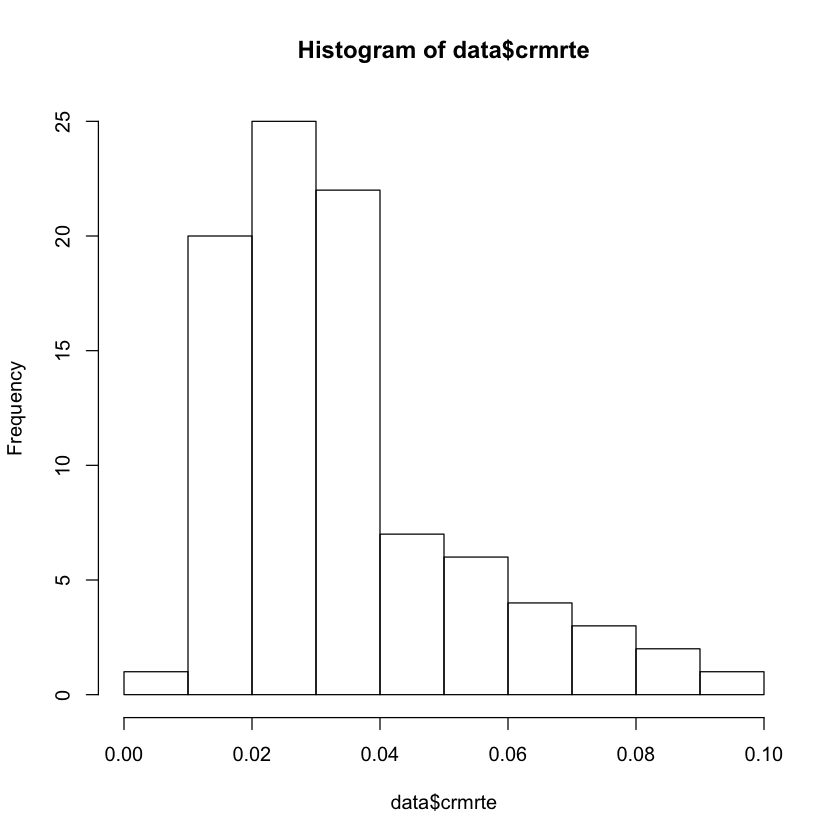

In [5]:
hist(data$crmrte)

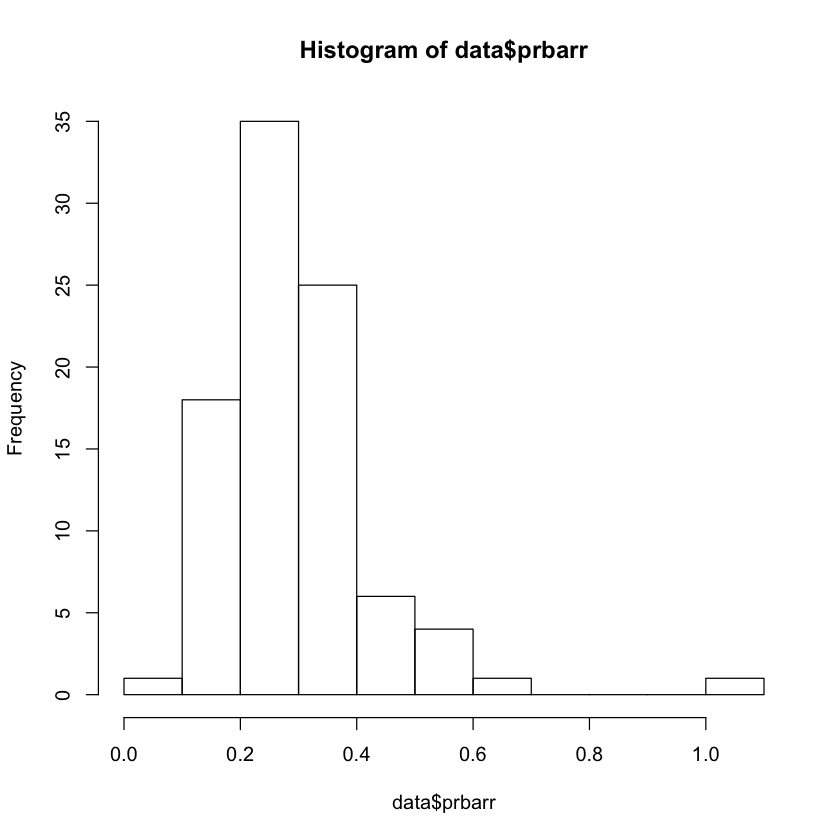

In [6]:
hist(data$prbarr)
# can you have a probability greater than 1?

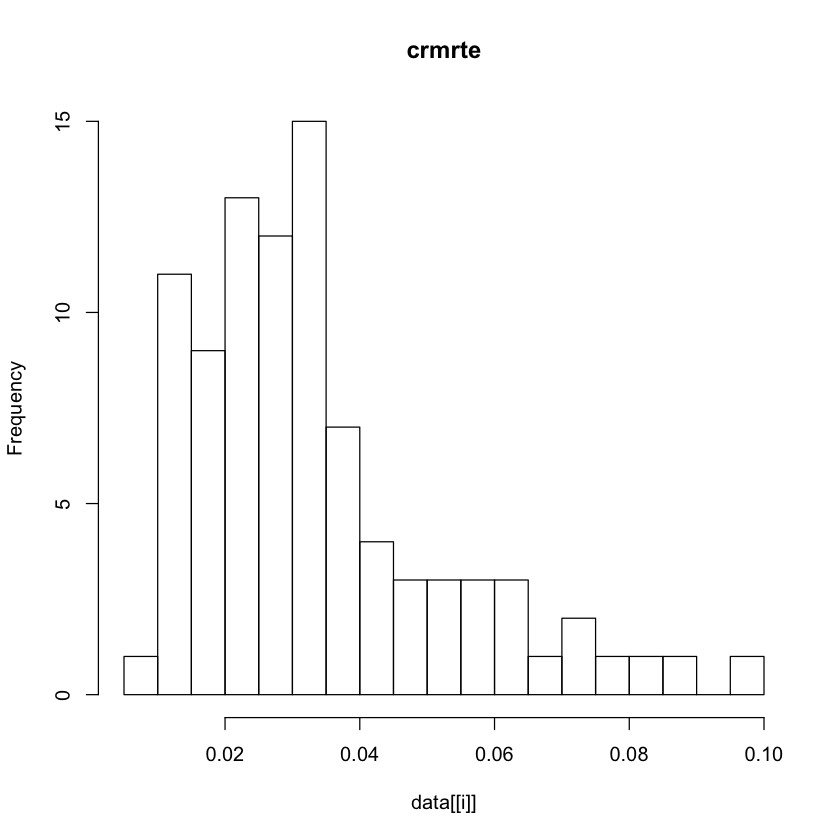

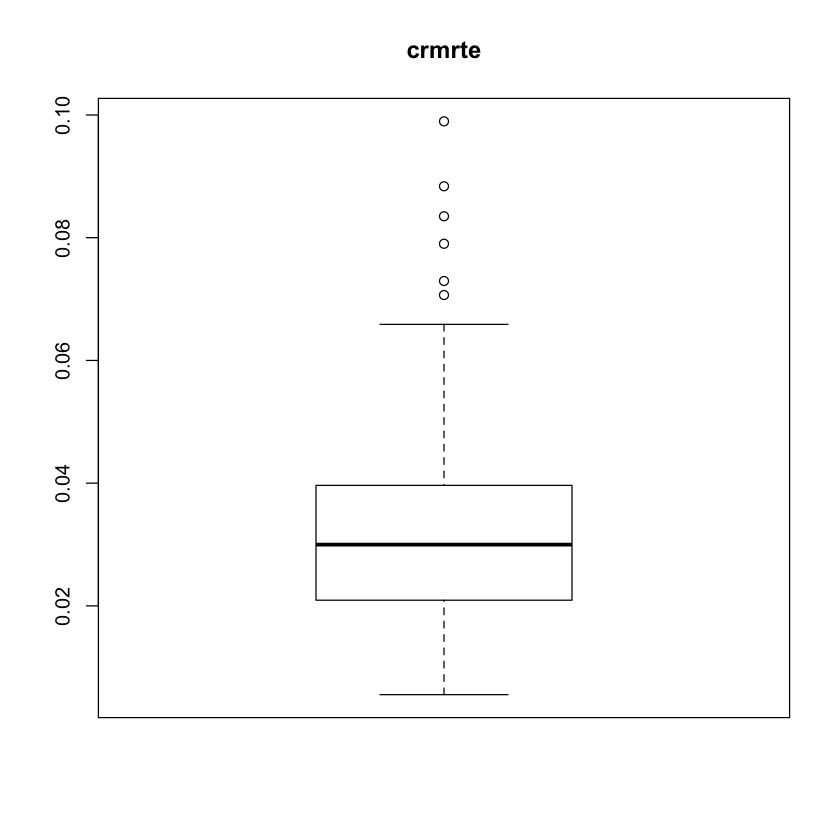

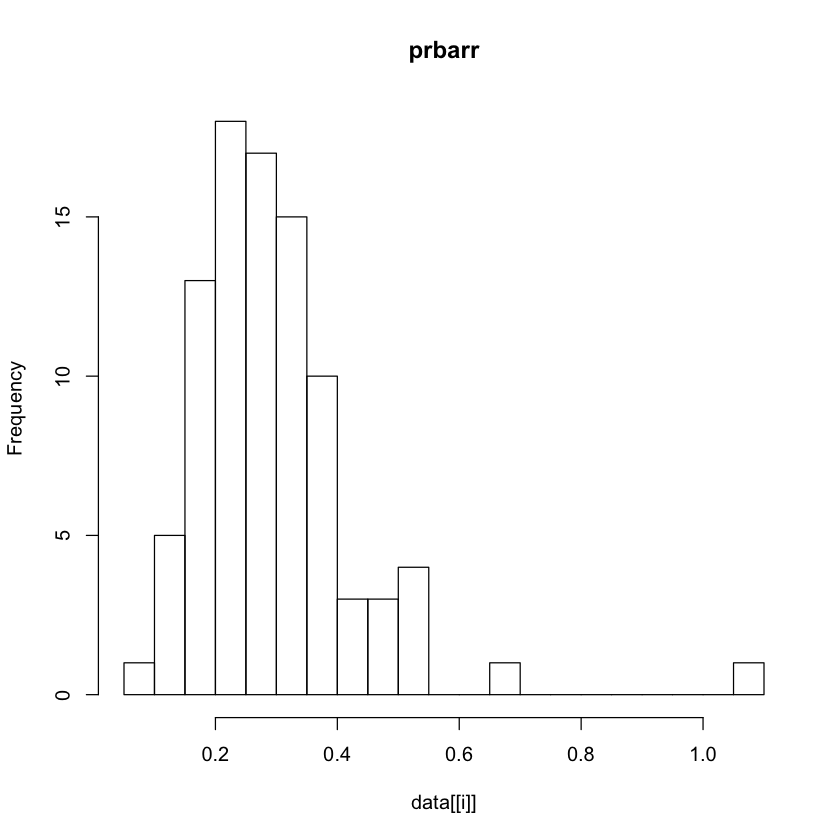

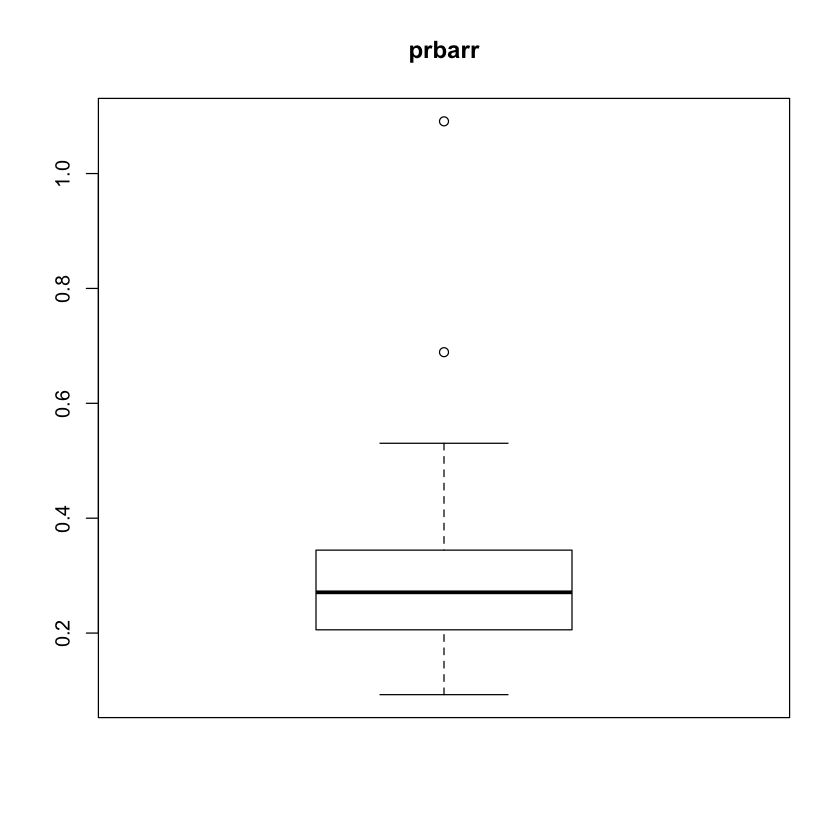

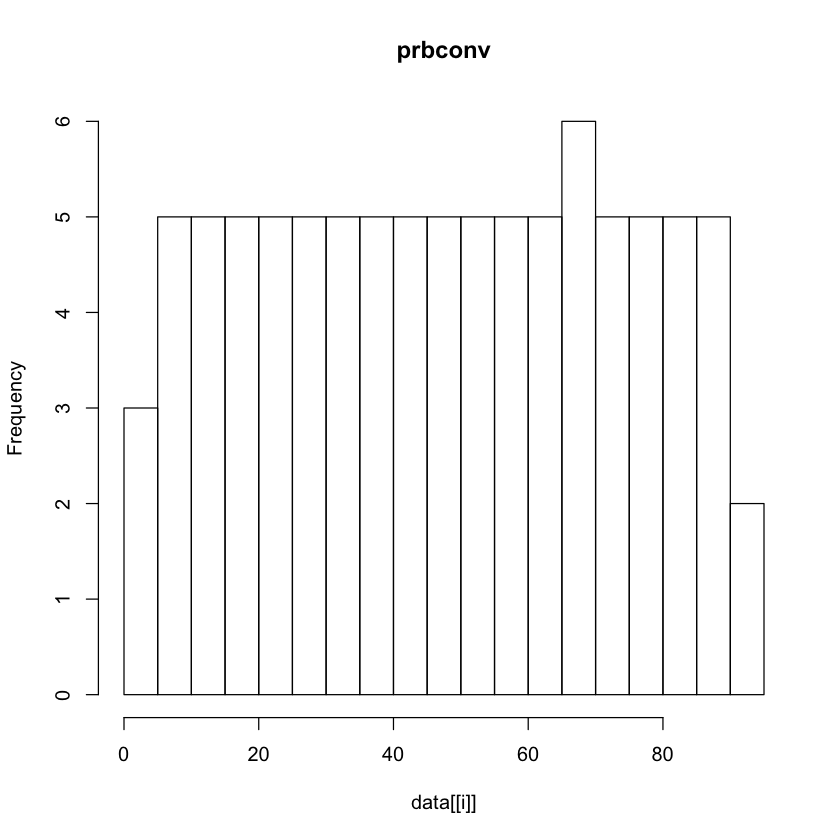

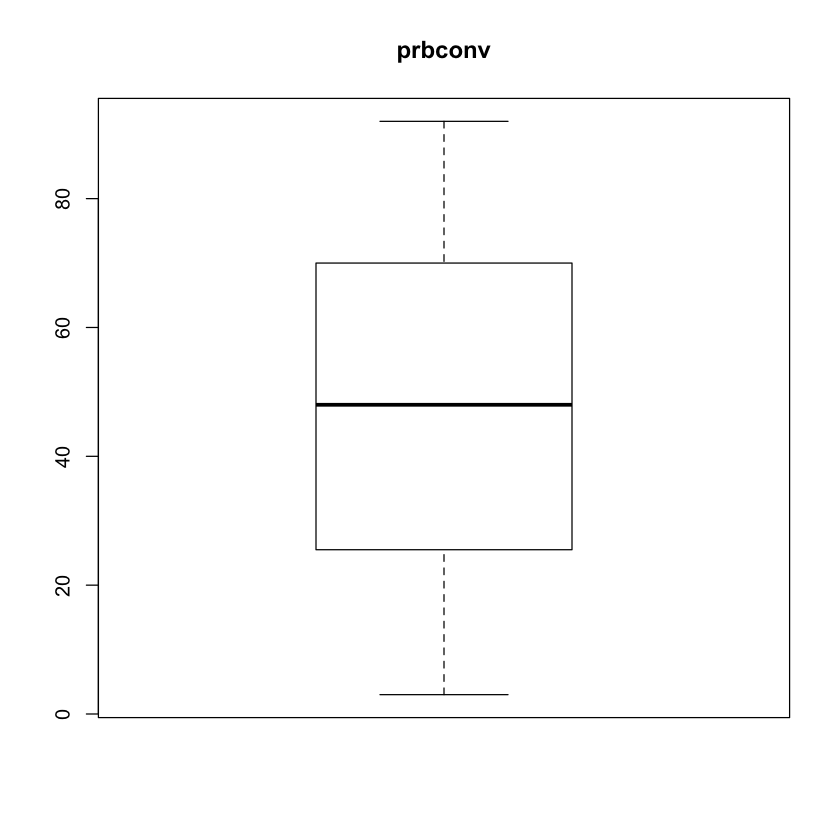

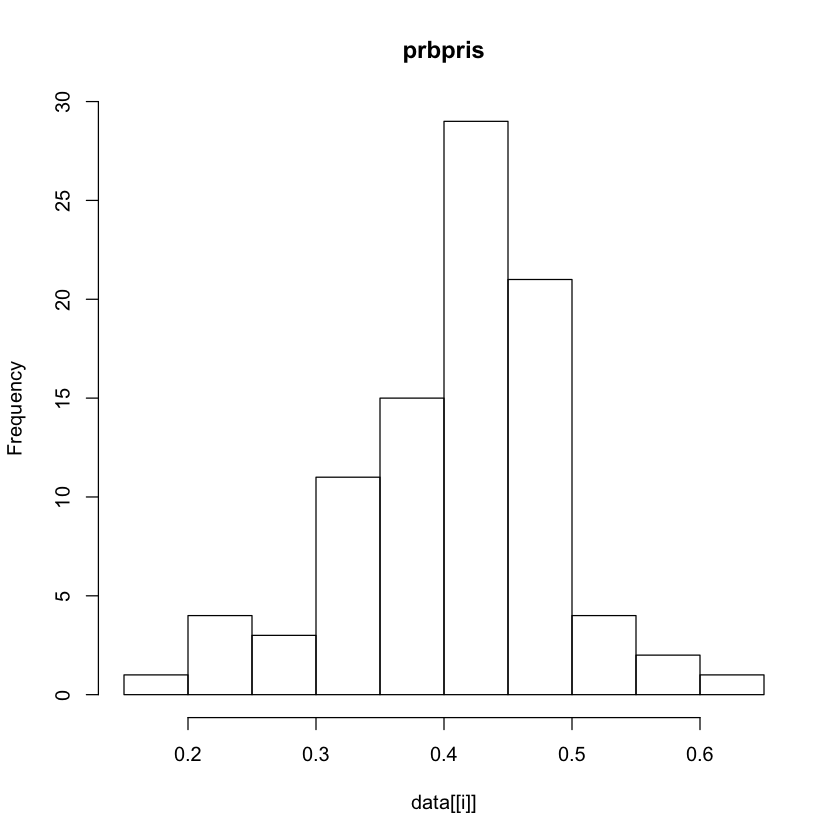

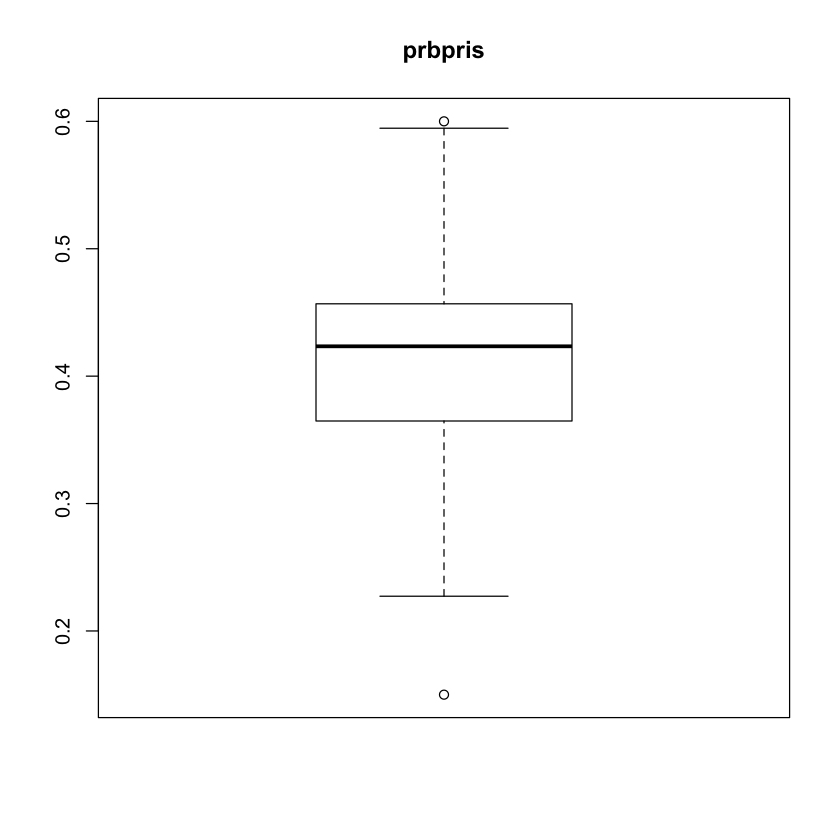

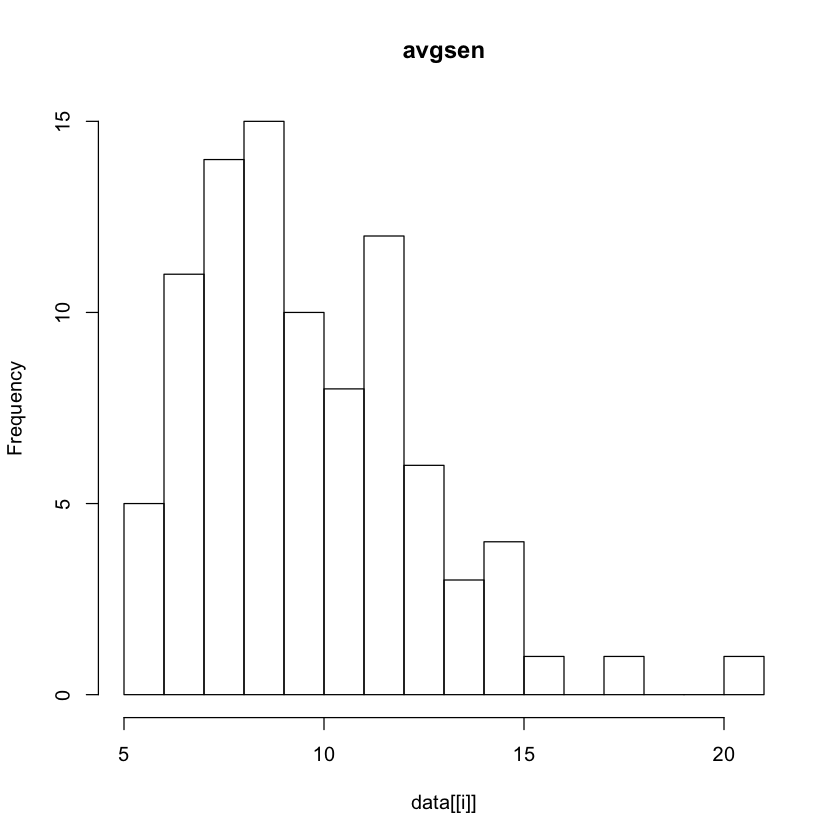

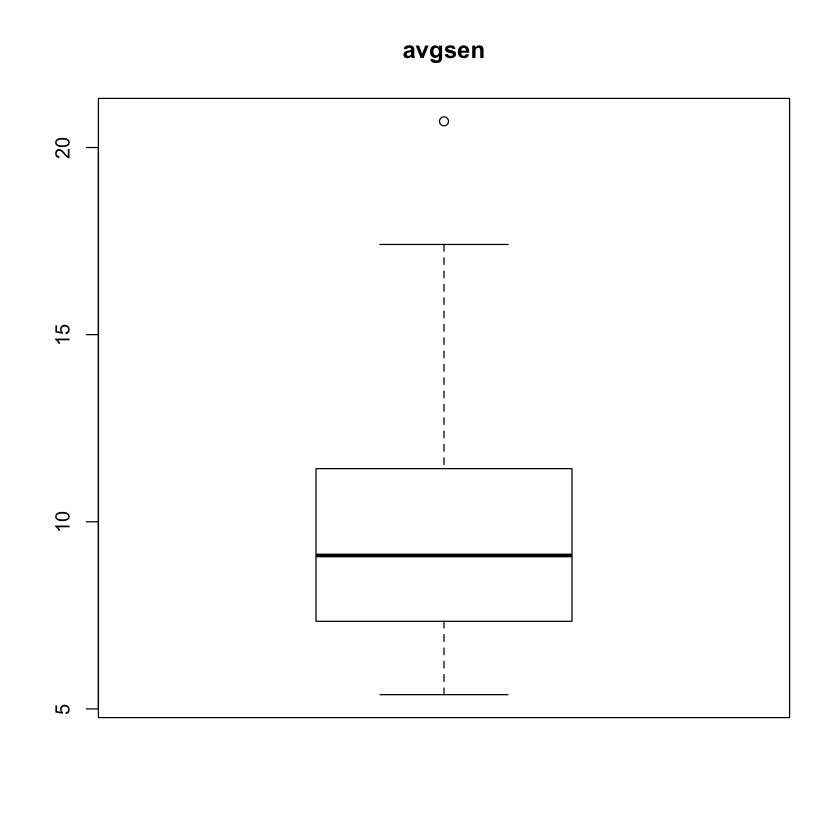

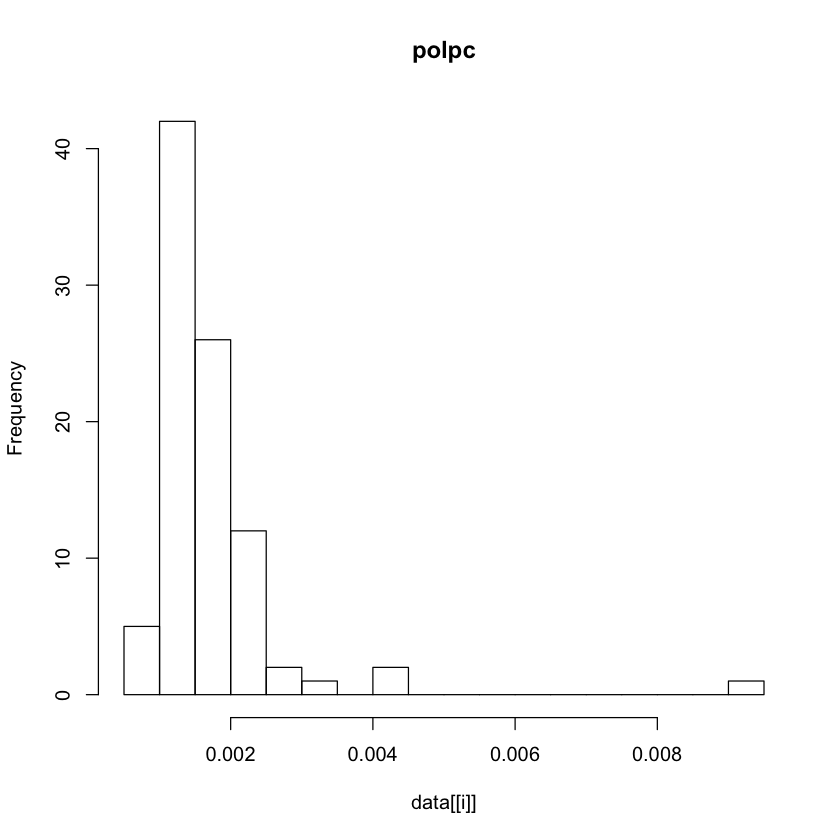

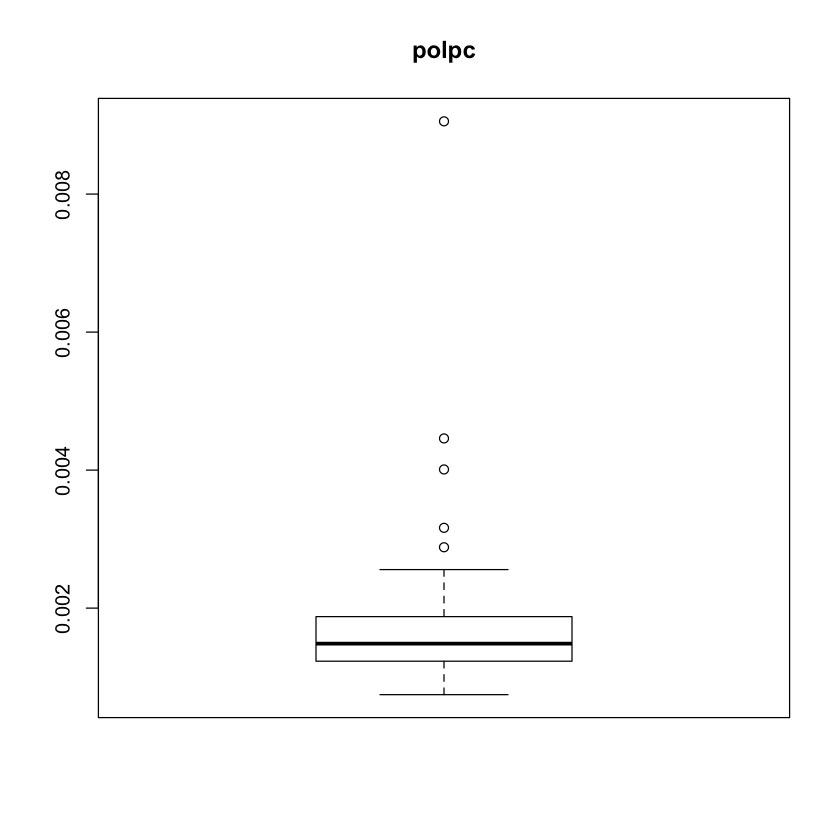

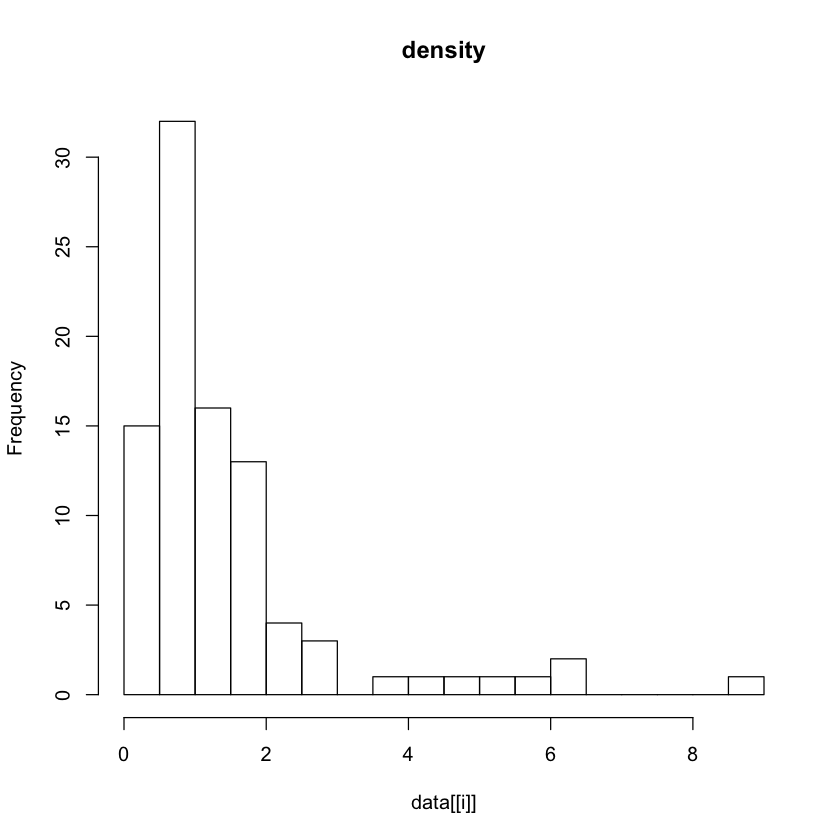

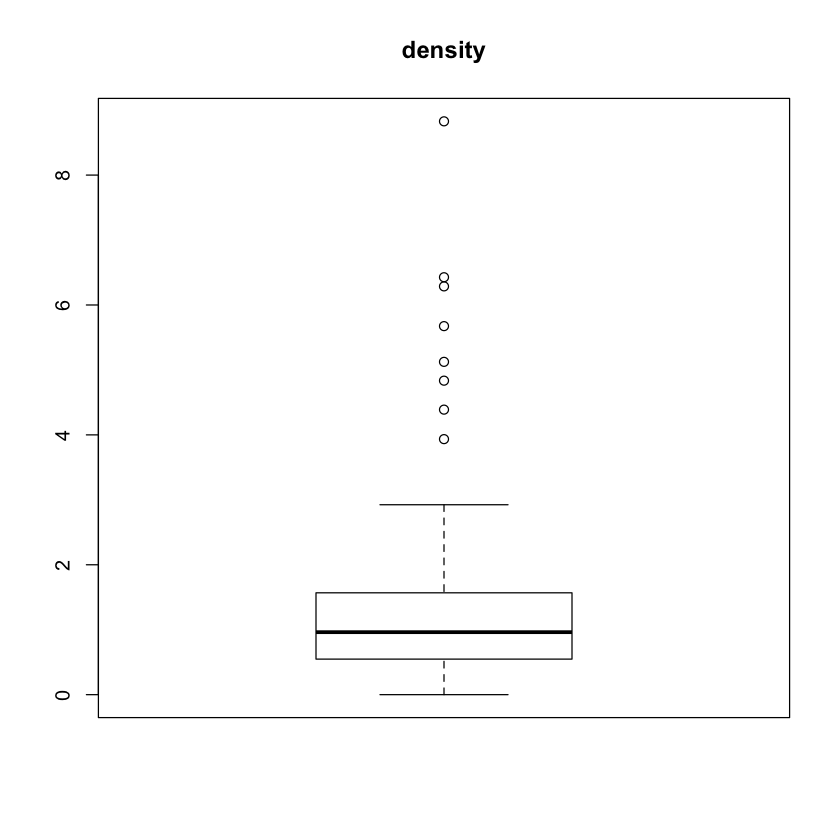

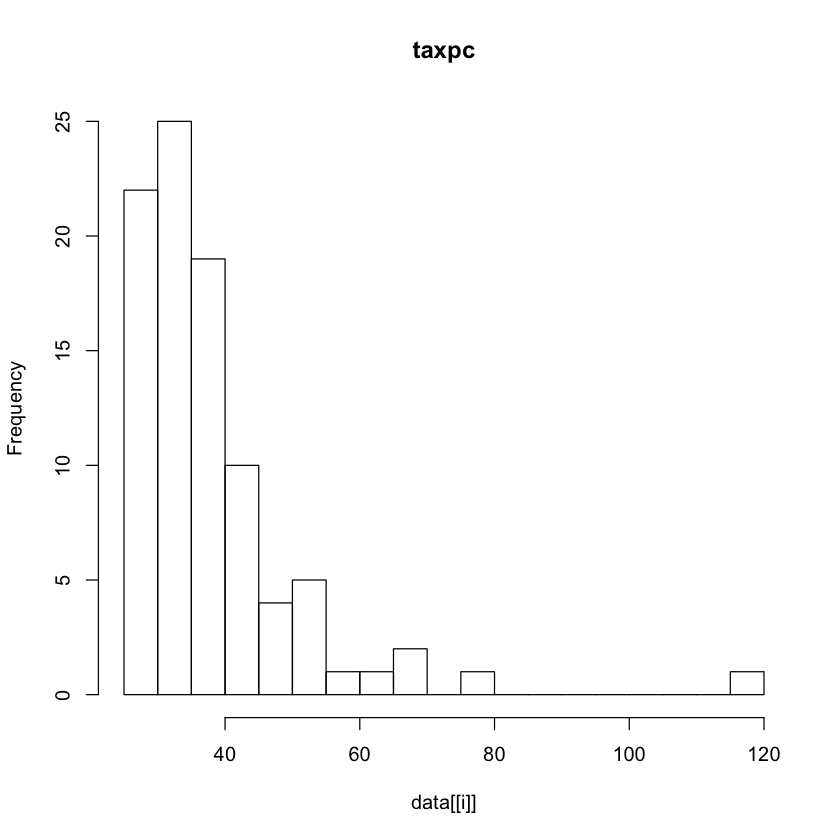

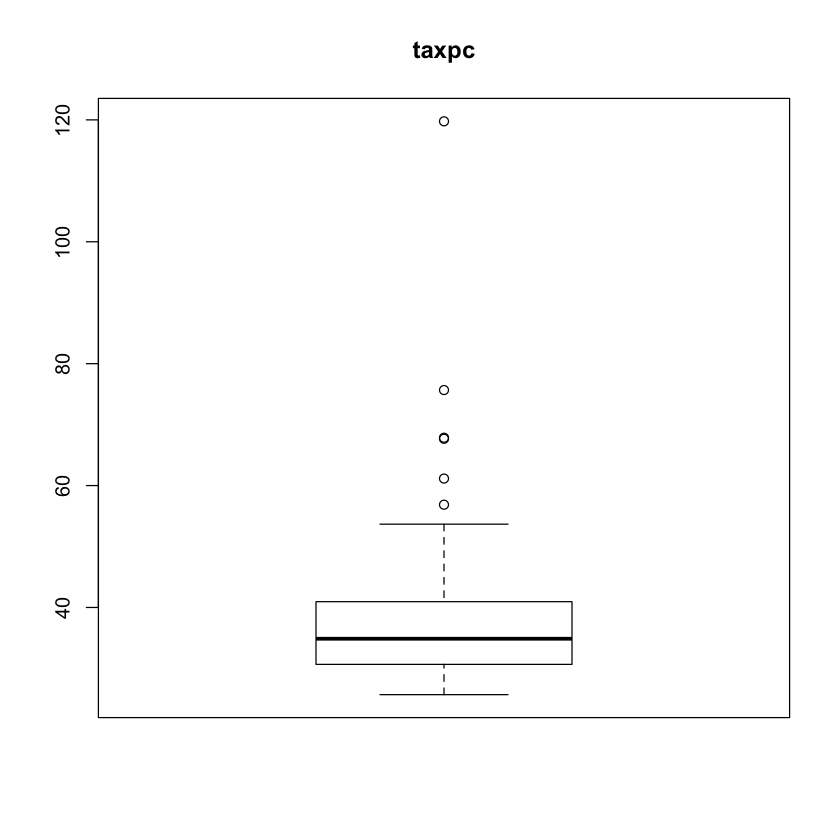

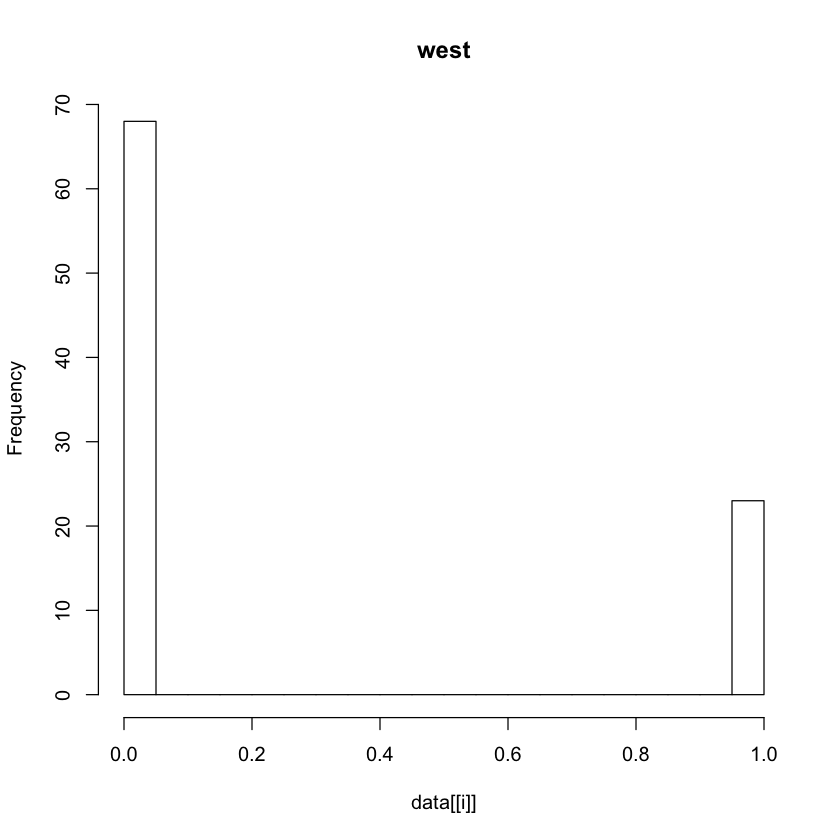

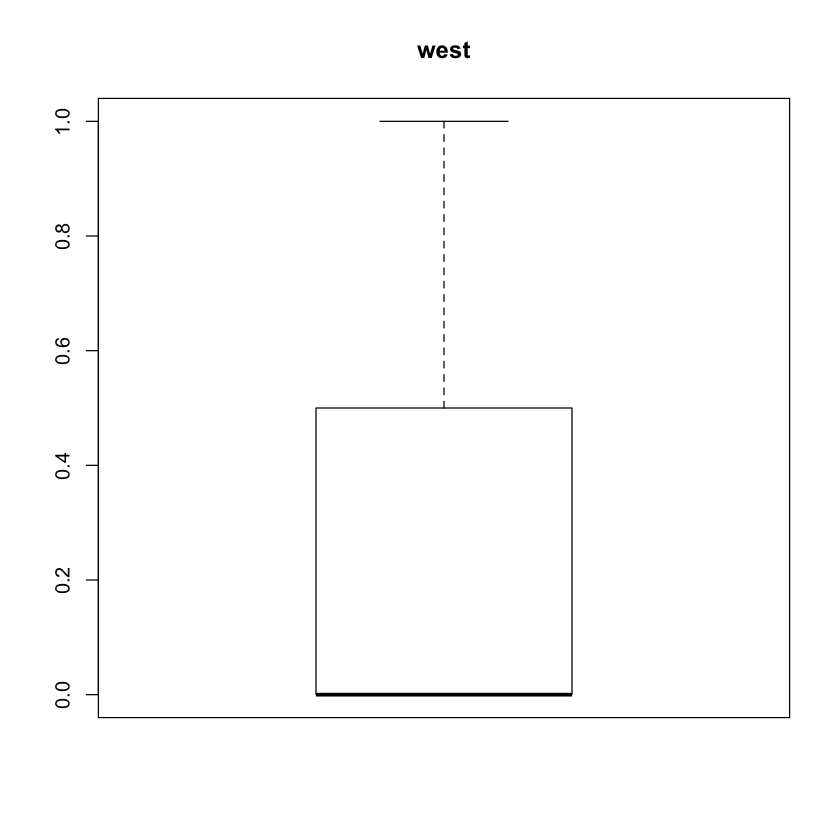

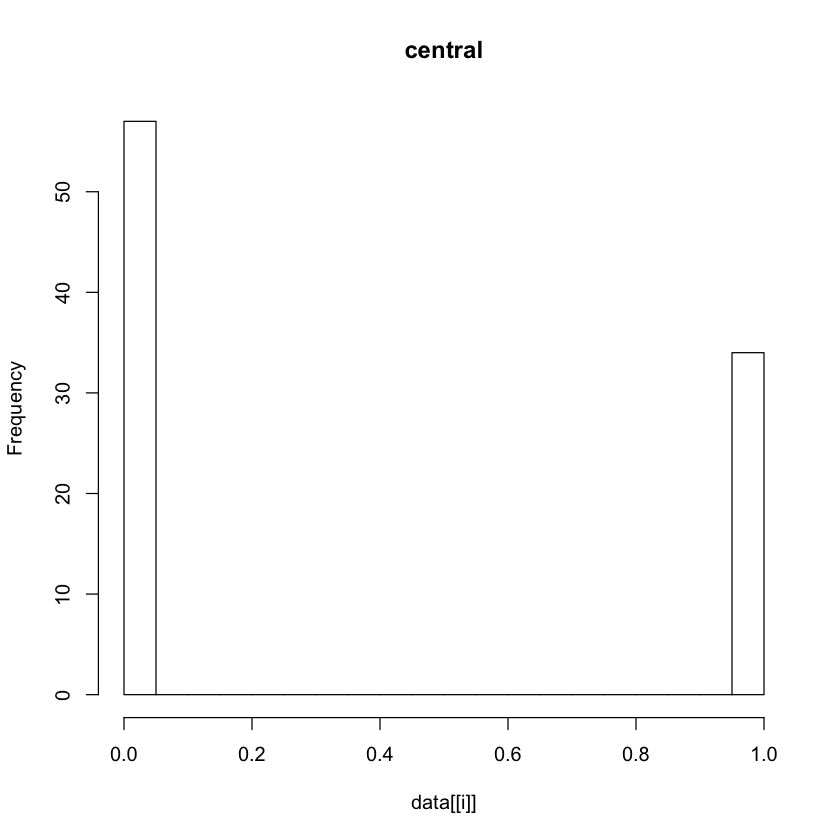

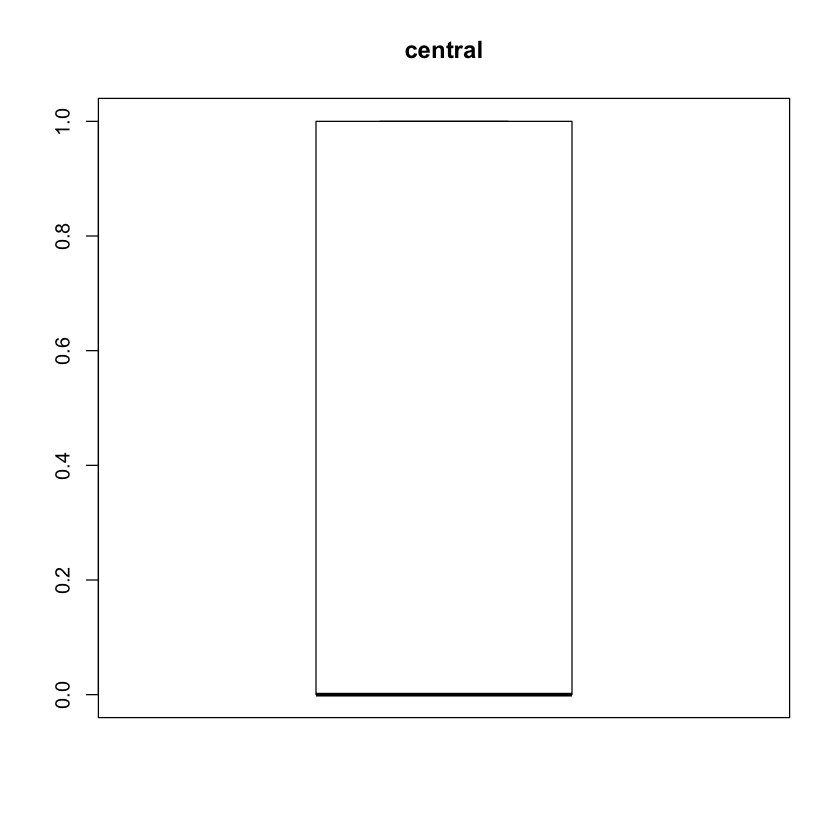

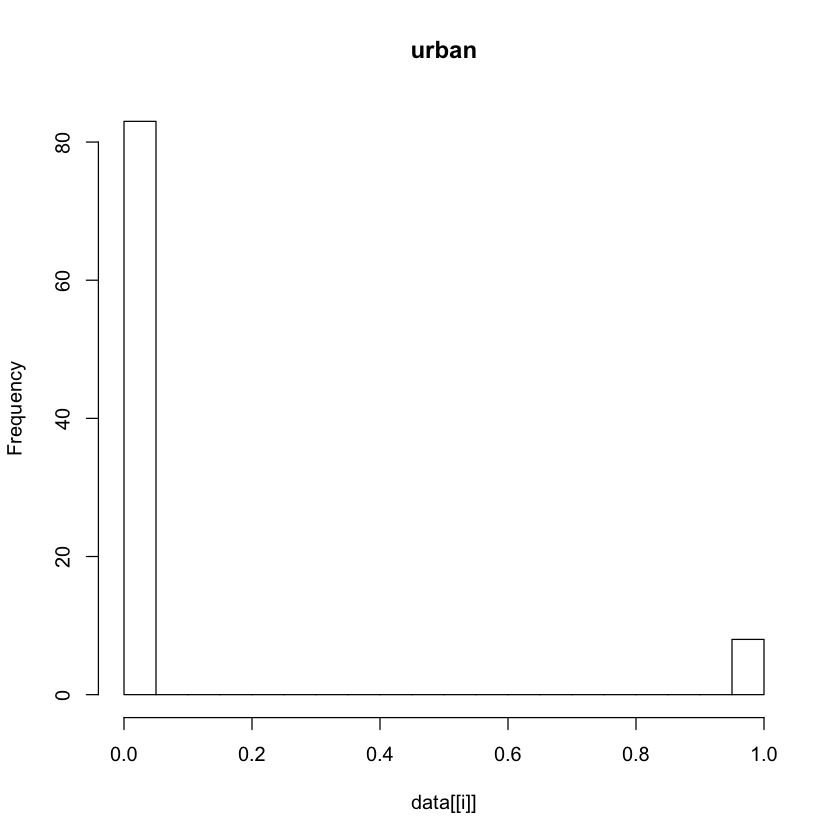

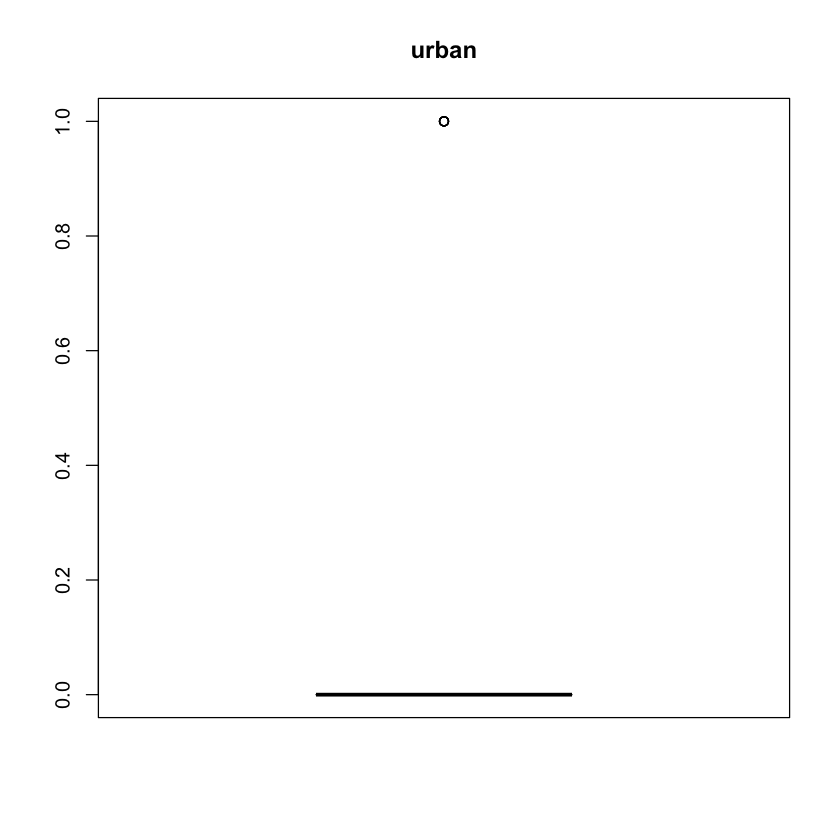

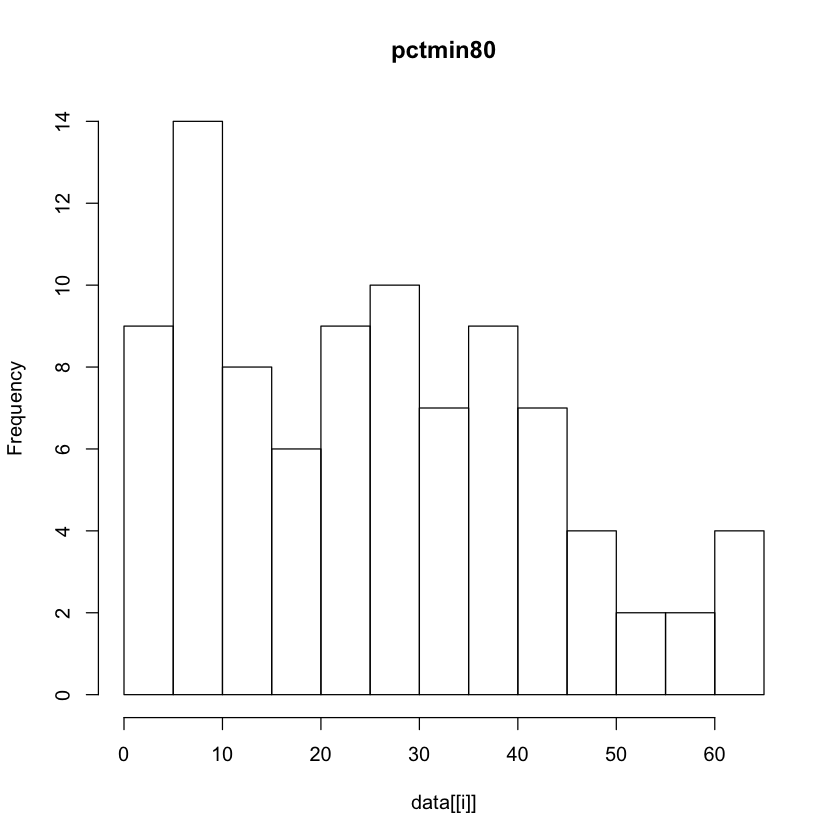

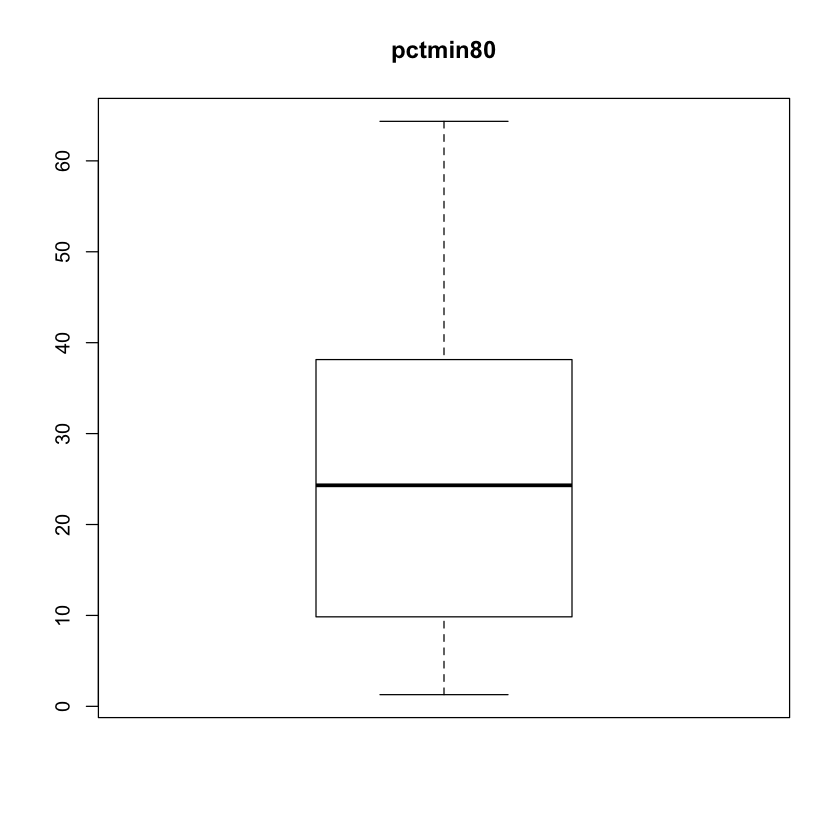

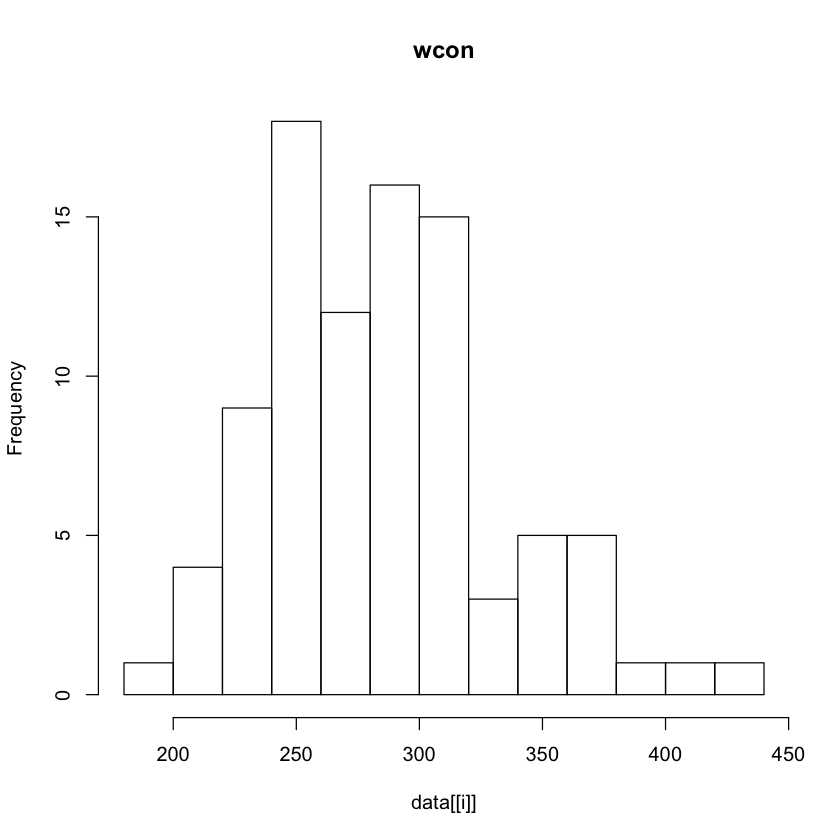

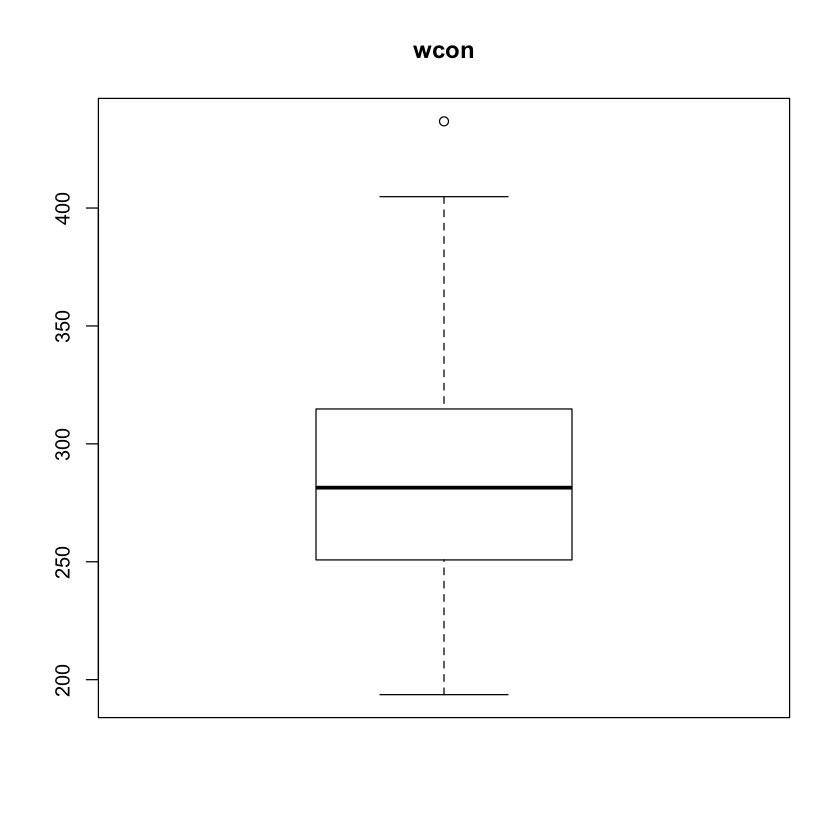

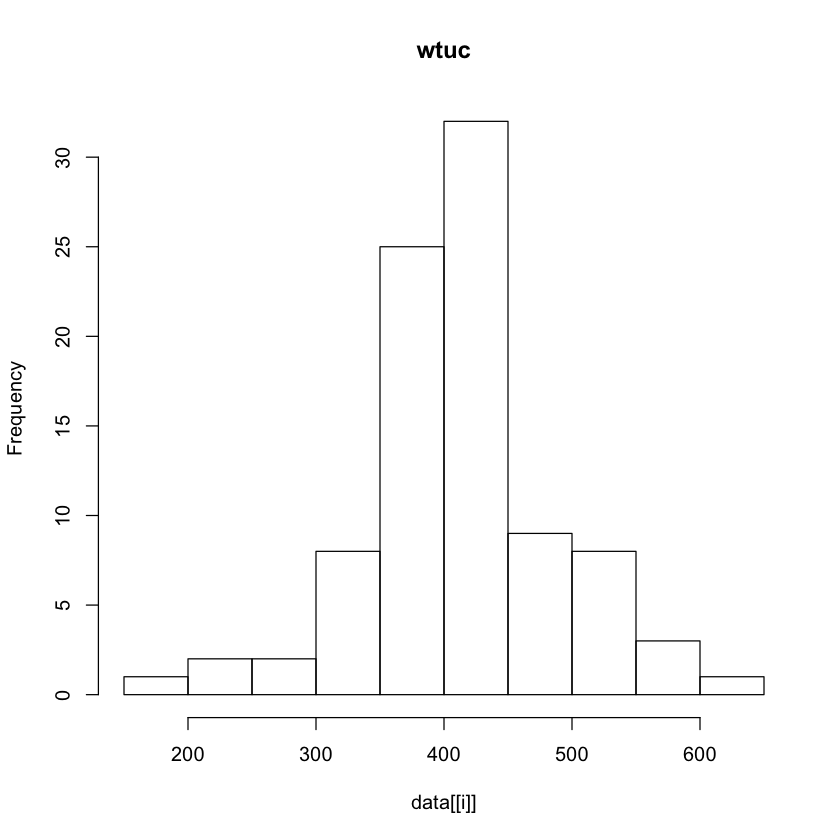

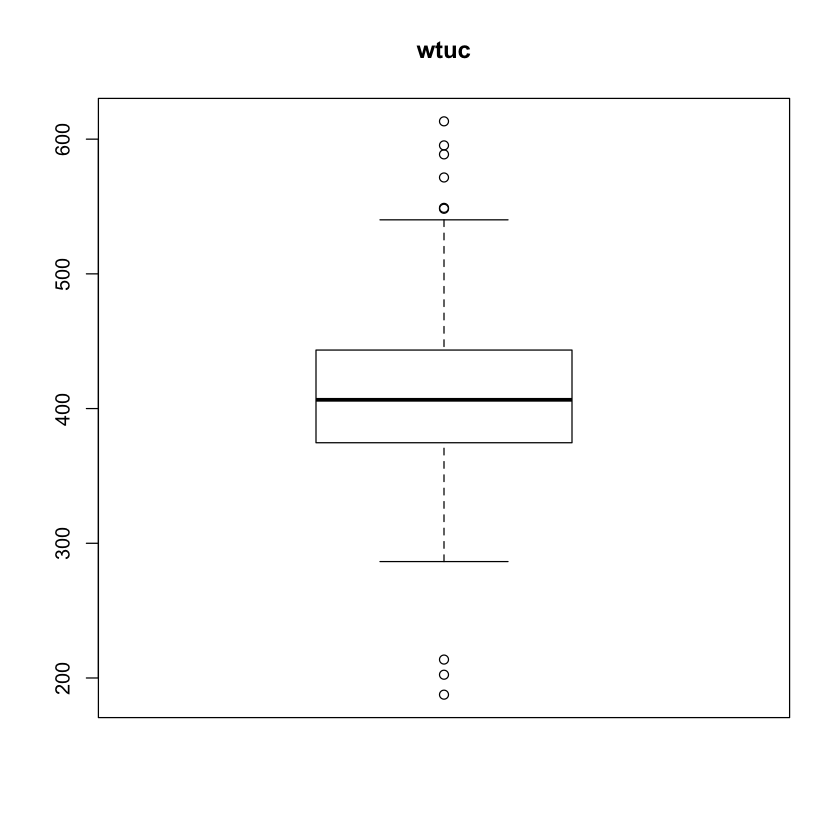

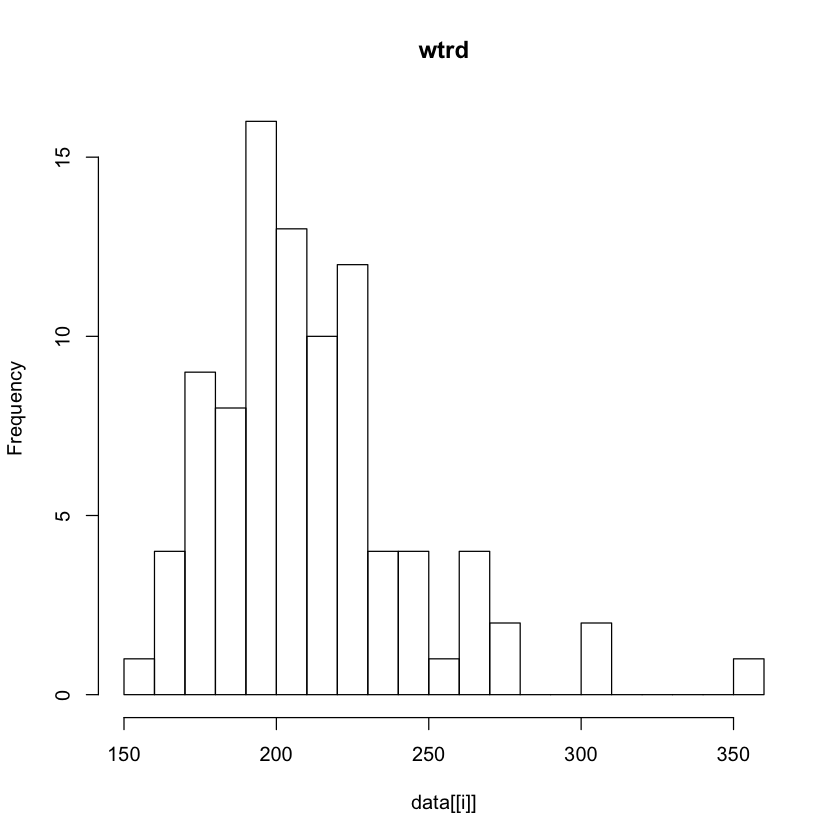

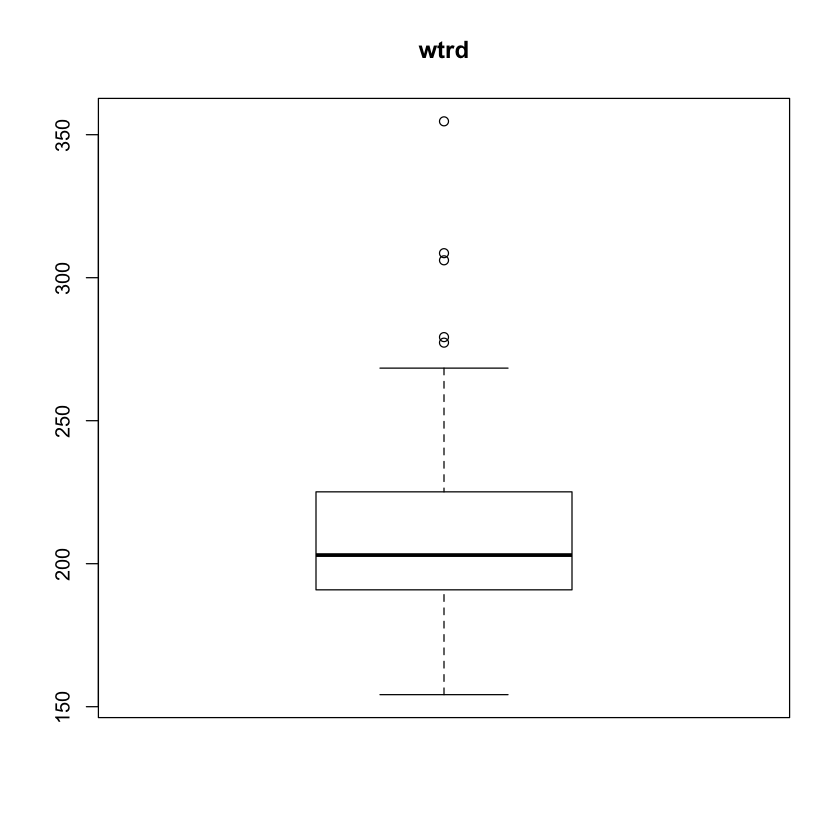

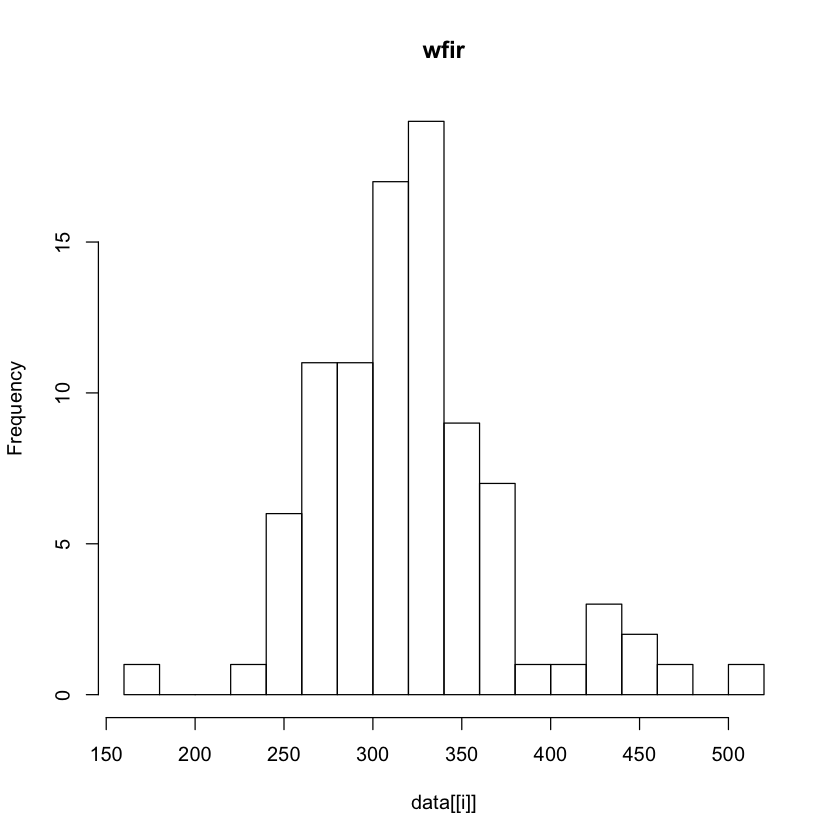

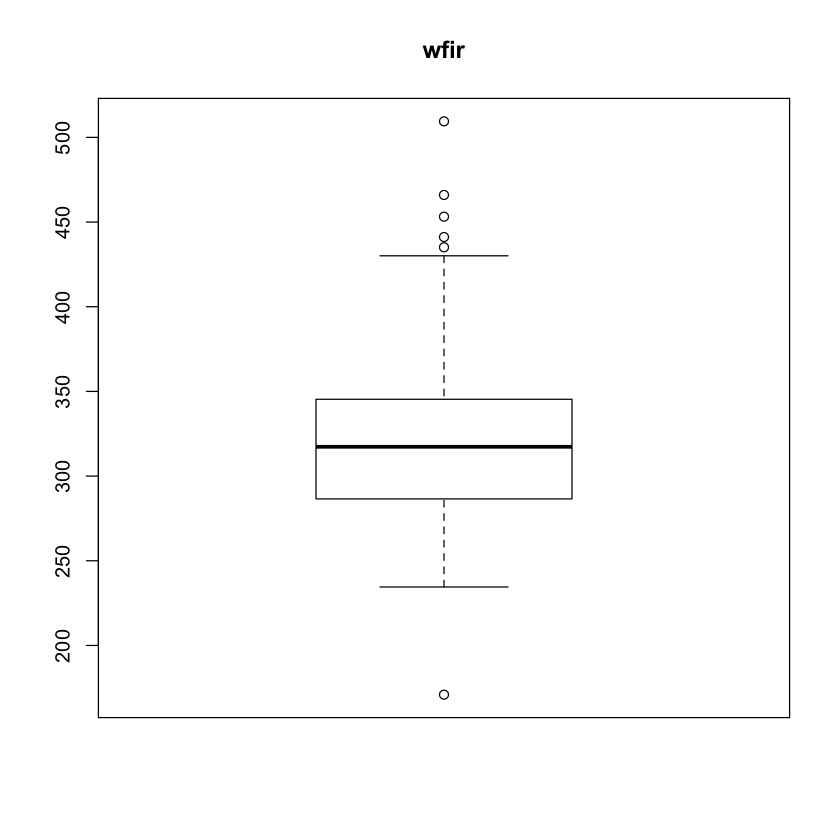

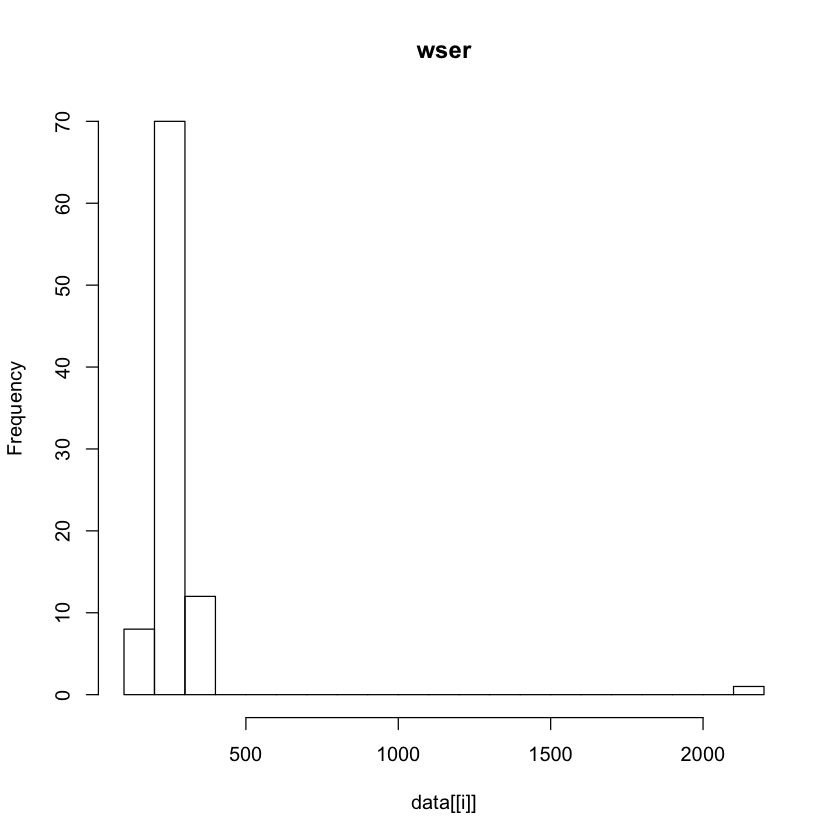

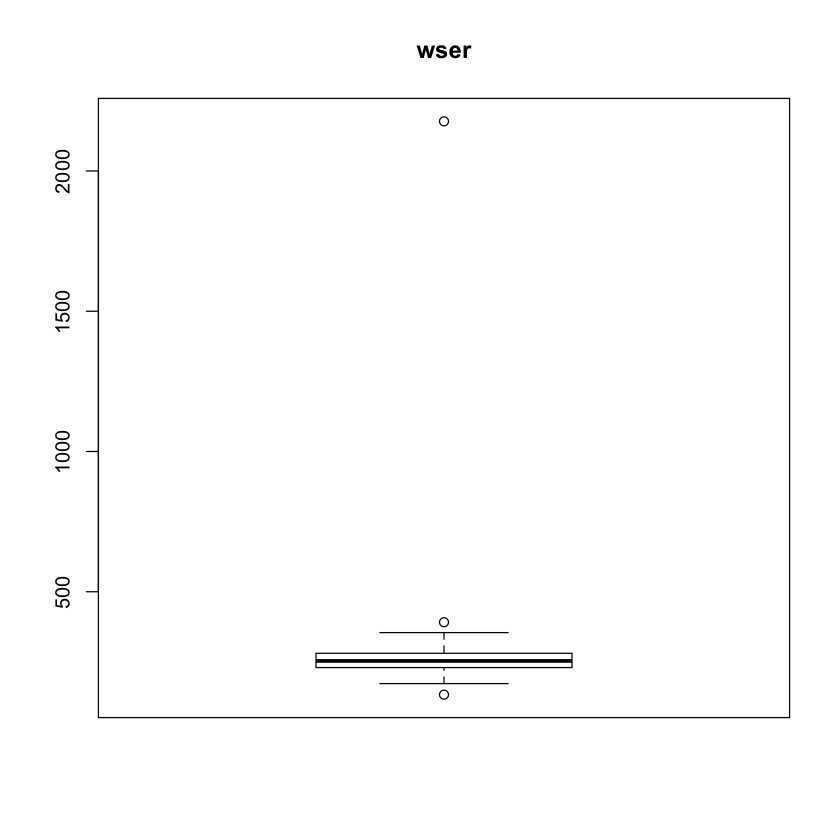

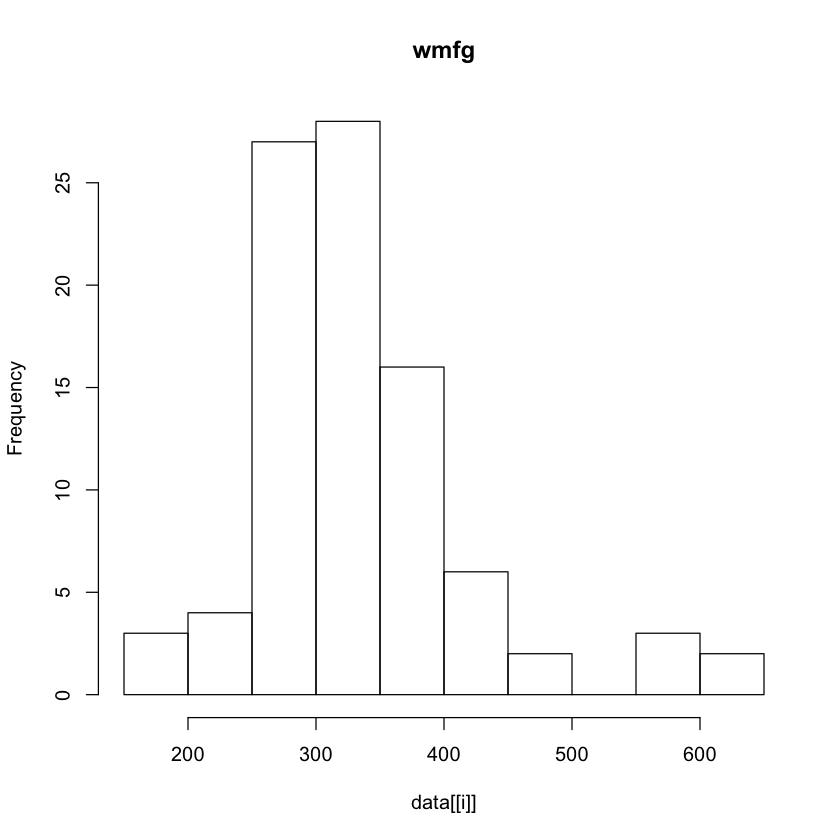

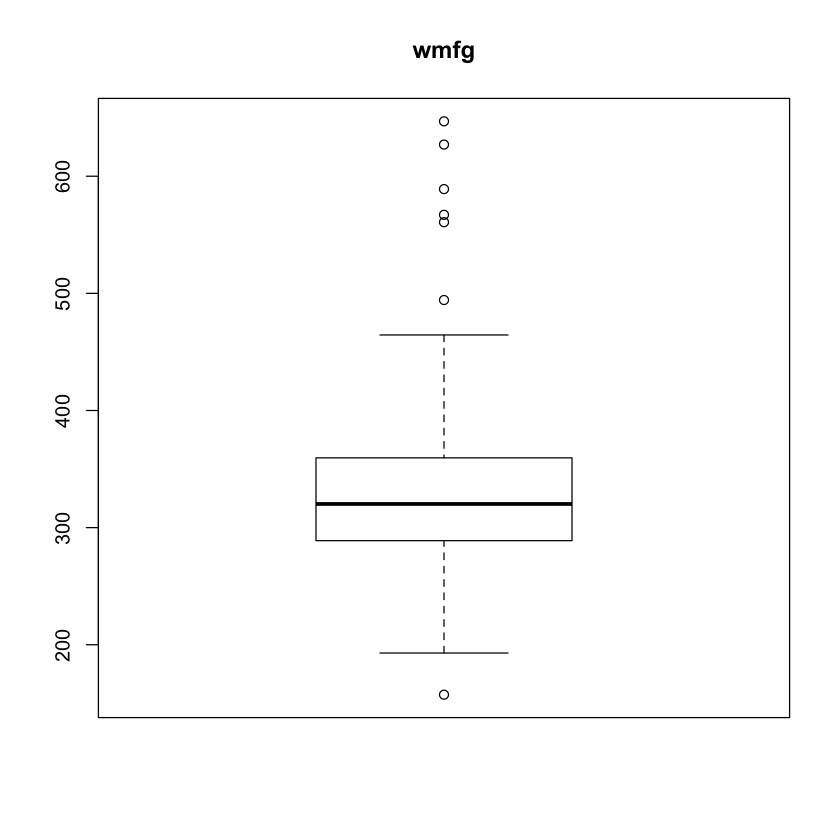

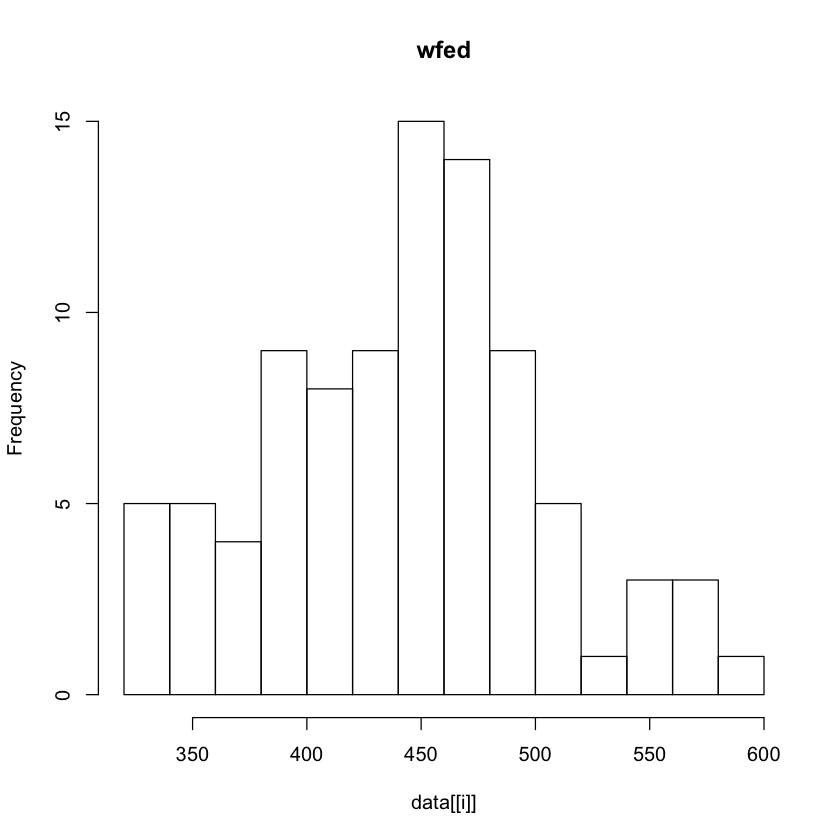

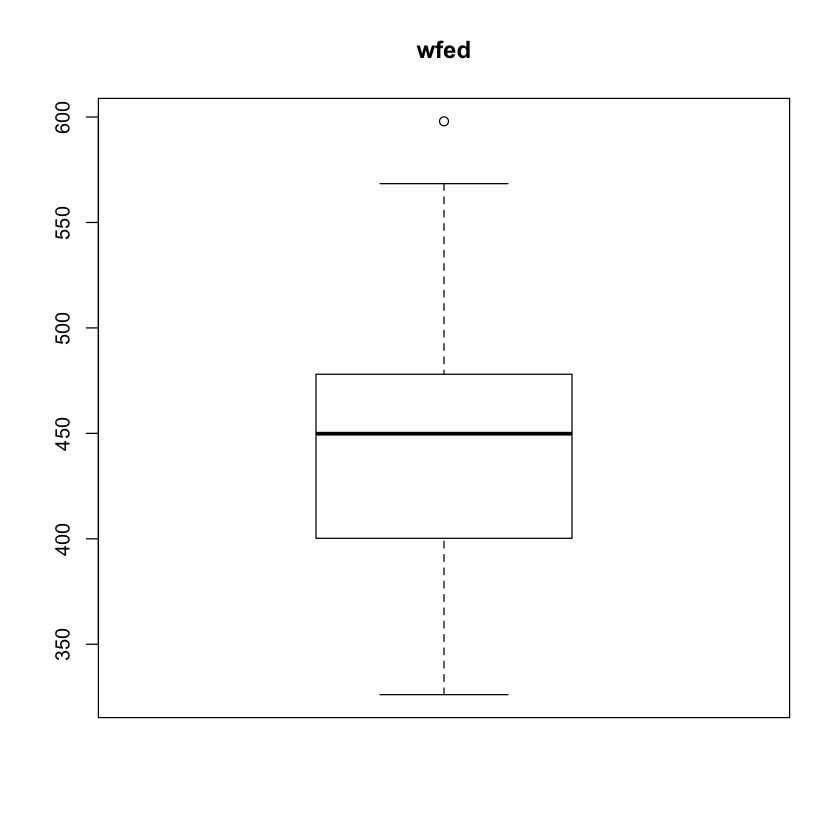

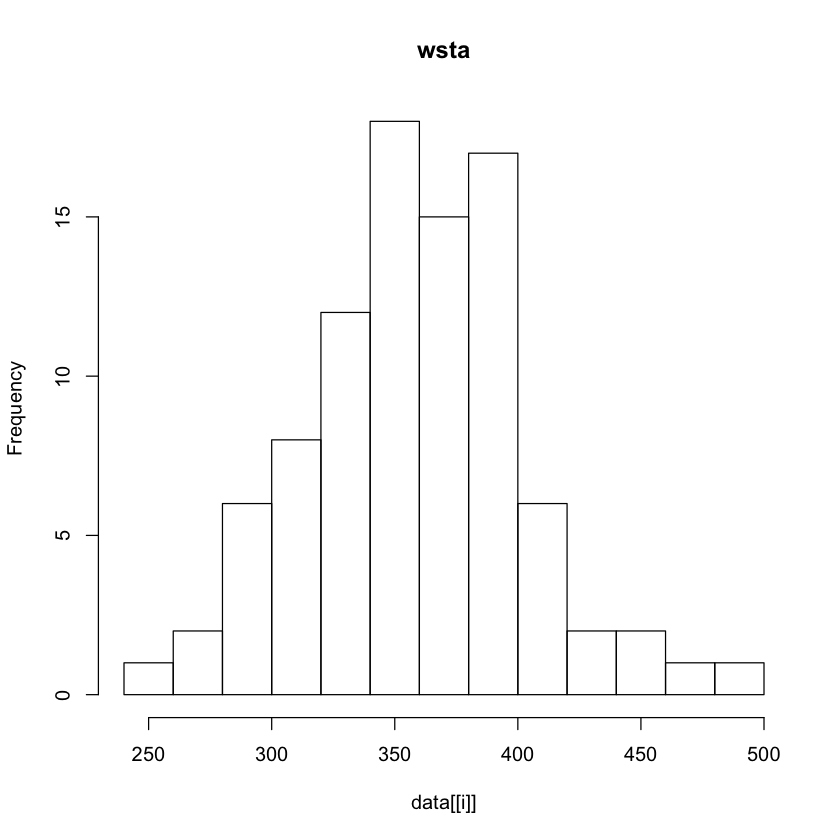

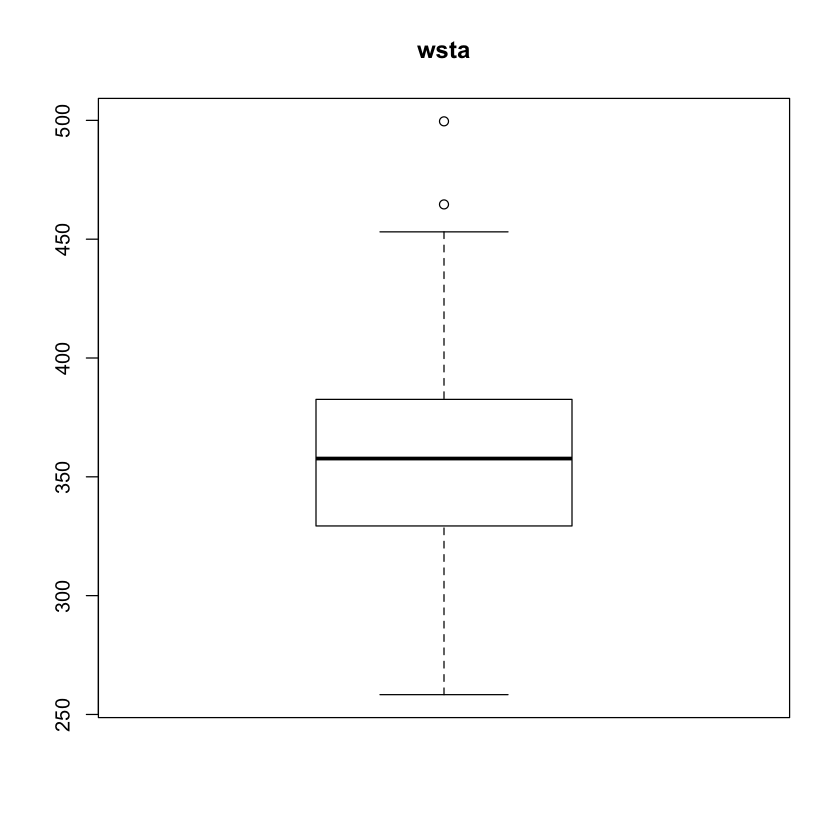

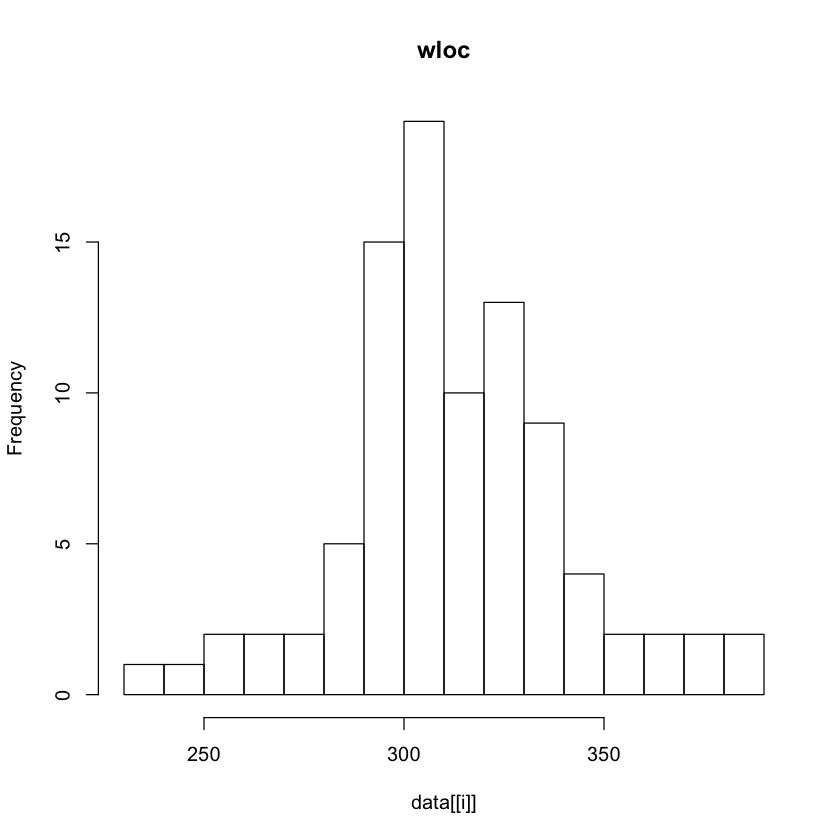

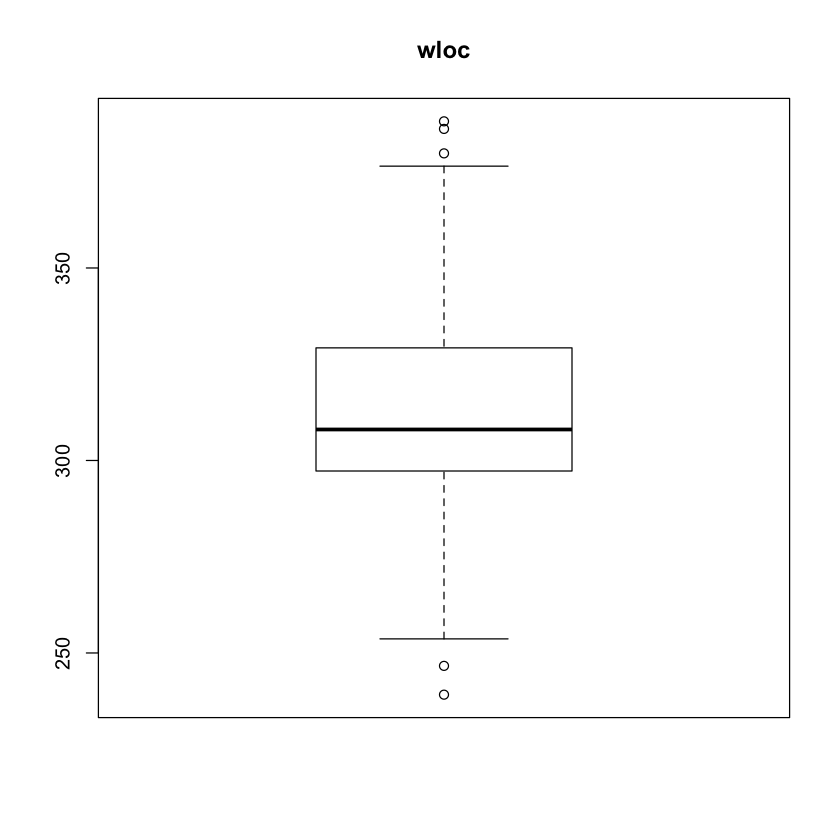

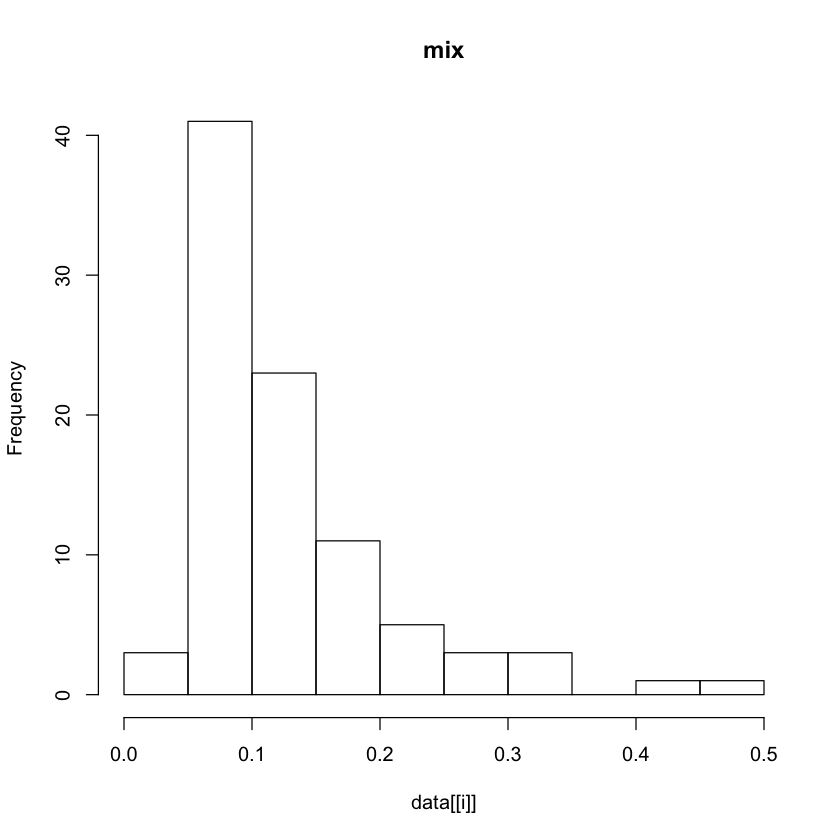

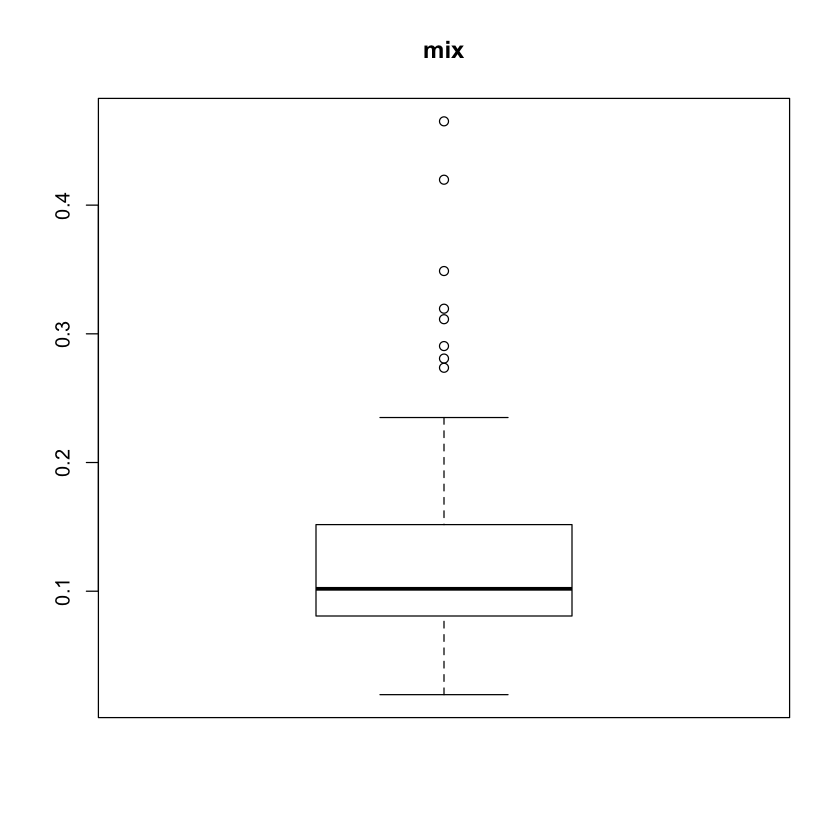

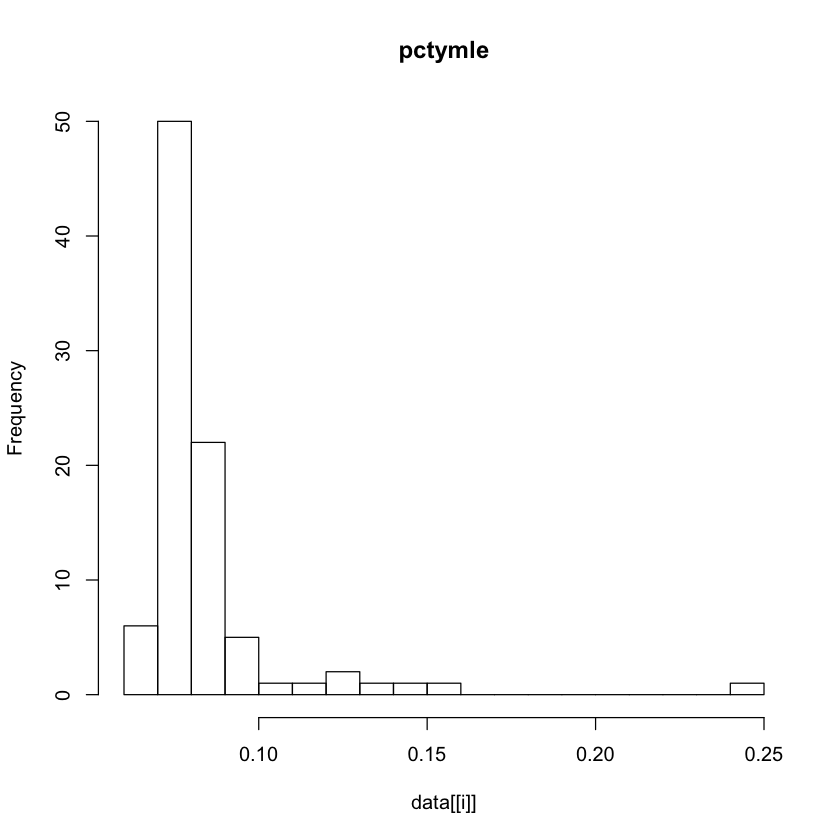

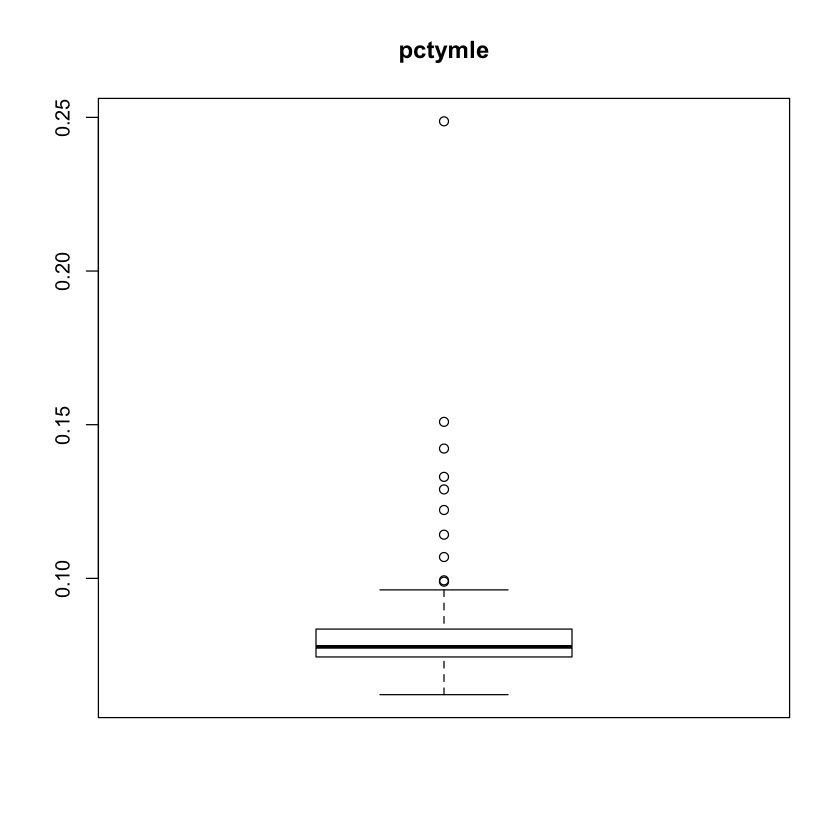

In [7]:
for(i in 3:ncol(data)){
  if(is.numeric(data[[i]])){
    hist(data[[i]], breaks = 15, main = colnames(data)[i])
    boxplot(data[[i]], breaks = 15, main = colnames(data)[i])
  }
}


Call:
lm(formula = crmrte ~ prbarr, data = data)

Coefficients:
(Intercept)       prbarr  
    0.04933     -0.05403  


[1] 0.1547083

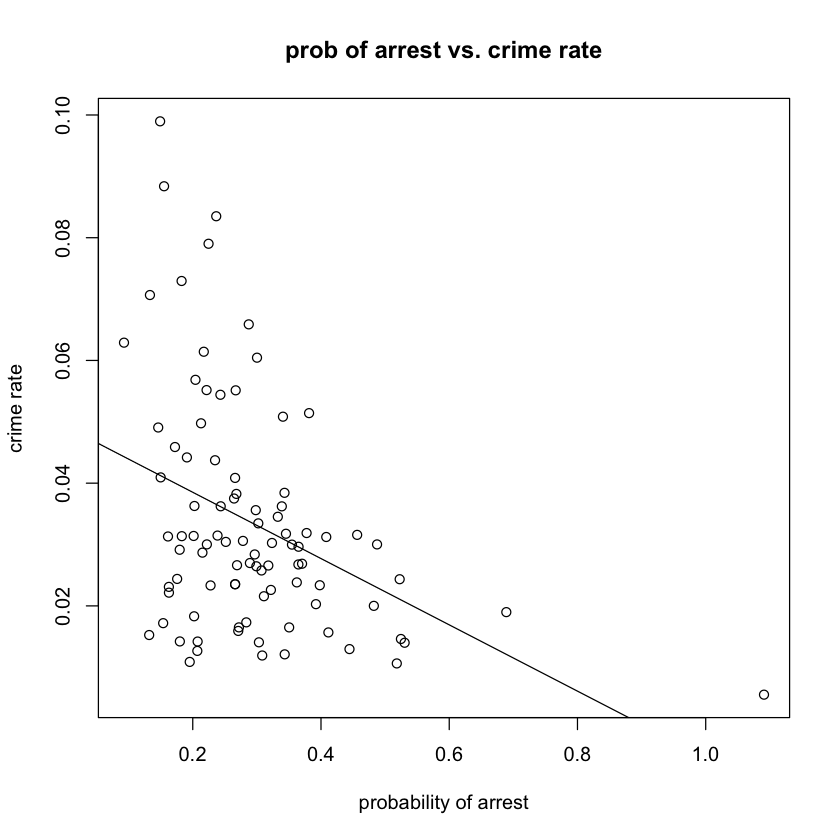

In [8]:
plot(data$prbarr, data$crmrte, xlab = "probability of arrest", 
     ylab = "crime rate", main = "prob of arrest vs. crime rate")
(prbarrmodel <- lm(crmrte ~ prbarr, data = data))
abline(prbarrmodel)
summary(prbarrmodel)$r.square



Call:
lm(formula = crmrte ~ prbpris, data = data)

Coefficients:
(Intercept)      prbpris  
    0.02888      0.01102  


[1] 0.002207522

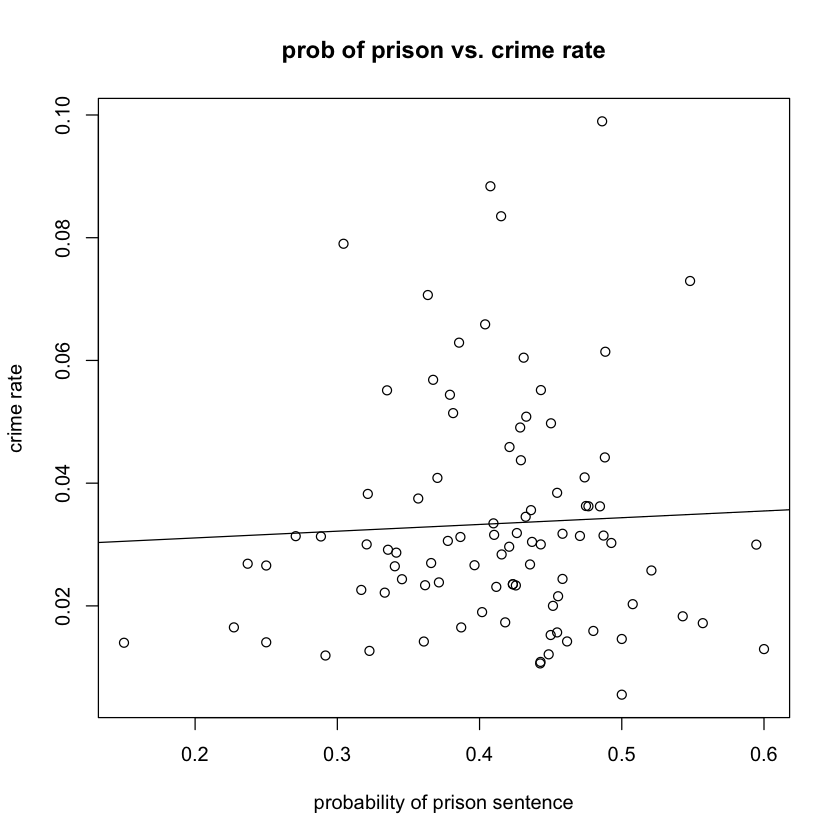

In [9]:
plot(data$prbpris, data$crmrte, xlab = "probability of prison sentence", 
     ylab = "crime rate", main = "prob of prison vs. crime rate")
(prprismodel <- lm(crmrte ~ prbpris, data = data))
abline(prprismodel)
summary(prprismodel)$r.square


Call:
lm(formula = crmrte ~ prbconv, data = data)

Coefficients:
(Intercept)      prbconv  
  0.0471117   -0.0002872  


[1] 0.158586

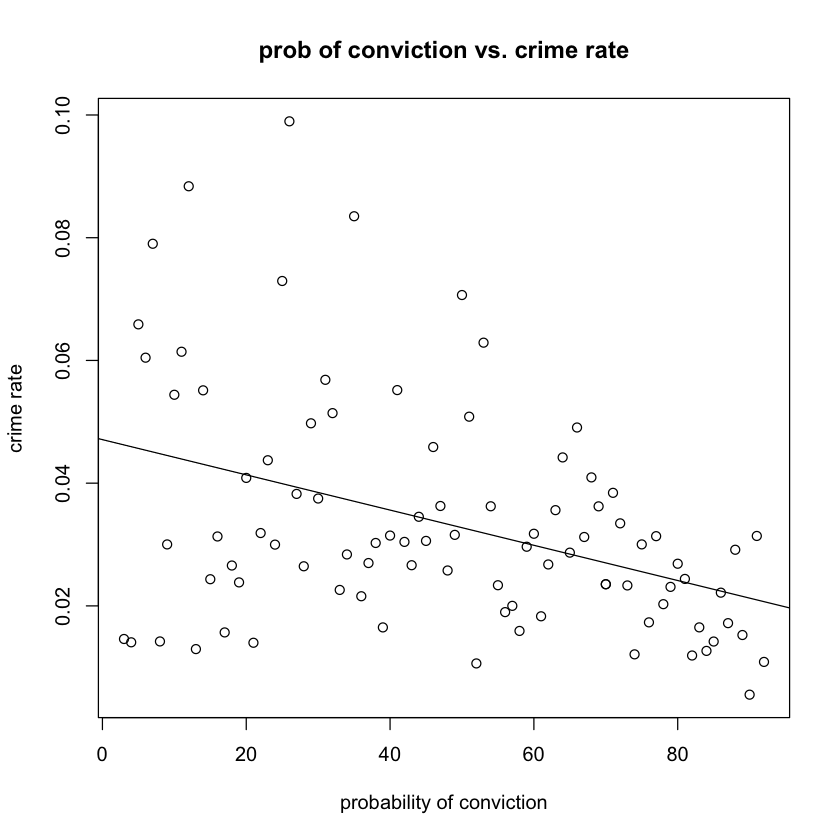

In [10]:
plot(data$prbconv, data$crmrte, xlab = "probability of conviction", 
     ylab = "crime rate", main = "prob of conviction vs. crime rate")
(prbconvmodel <- lm(crmrte ~ prbconv, data = data))
abline(prbconvmodel)
summary(prbconvmodel)$r.square


Call:
lm(formula = log(crmrte) ~ polpc, data = data)

Coefficients:
(Intercept)        polpc  
     -3.556        6.985  


[1] 0.0001593452

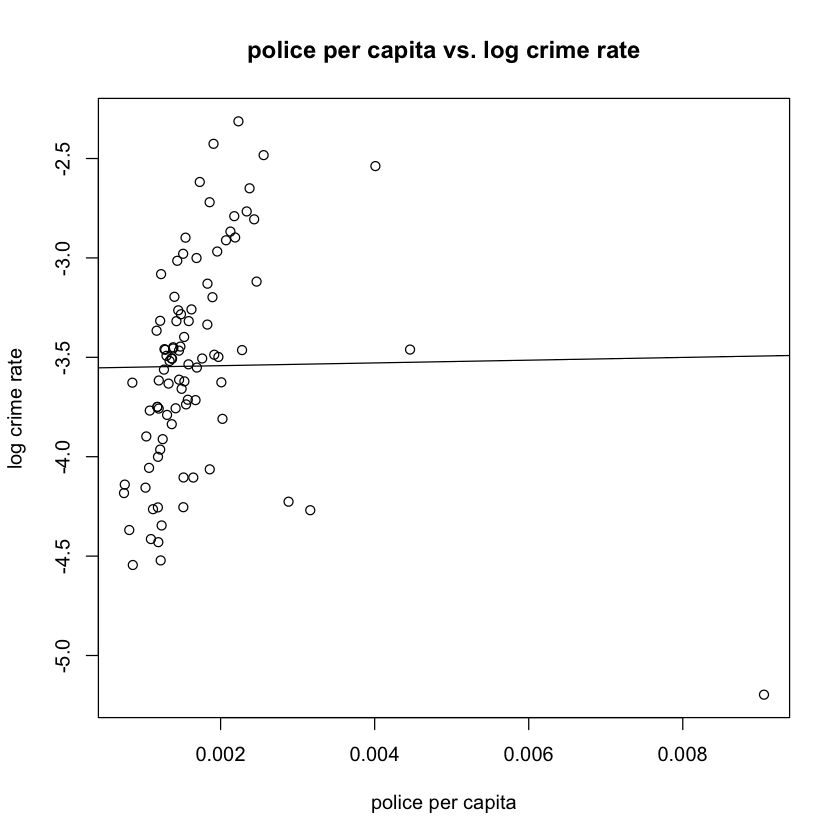

In [11]:
    plot(data$polpc, log(data$crmrte), xlab = "police per capita", 
         ylab = "log crime rate", main = "police per capita vs. log crime rate")
    (polpcmodel <- lm(log(crmrte) ~ polpc, data = data))
    abline(polpcmodel)
    summary(polpcmodel)$r.square

In [12]:
library(car)
scatterplotMatrix(~ density + polpc + taxpc + avgsen + west + central + urban + wsta, data = data)


ERROR: Error in library(car): there is no package called ‘car’
